# Import all necessary libraries

In [159]:
# Import all necessary libraries
import pandas as pd
import numpy as np
import psycopg2 # needed to get database exception errors when uploading dataframe
import requests # package for getting data from the web
from zipfile import * # package for unzipping zip files
import sqlalchemy
import os

In [11]:
df_land = pd.read_csv('kaggle/Agricultural Land.csv')
df_crops_units = pd.read_csv('kaggle/Crops_Units.csv')
df_groundwater = pd.read_csv('kaggle/Fresh groundwater abstracted.csv')
df_freshwater = pd.read_csv('kaggle/Freshwater abstracted.csv')
df_ghg = pd.read_csv('kaggle/GHG_Emissions_by_Sector.csv')

# agricultural land

In [12]:
df_land.describe()

,Unnamed: 8
count,0.0
mean,NaN
std,NaN
min,NaN
25%,NaN
50%,NaN
75%,NaN
max,NaN


In [201]:
df_land.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 225 entries, 0 to 224
Data columns (total 9 columns):
 #   Column                                                     Non-Null Count  Dtype  
---  ------                                                     --------------  -----  
 0   Country                                                    225 non-null    object 
 1   Agricultural area in 2013 (km2)                            225 non-null    object 
 2   % change of agricultural area since 1990                   225 non-null    object 
 3   % of total land area covered by agricultural area in 2013  225 non-null    object 
 4   Arable land in 2013 (km2)                                  225 non-null    object 
 5   Permanent crops in 2013 (km2)                              225 non-null    object 
 6   Permanent meadows and pastures in 2013 (km2)               225 non-null    object 
 7   Agricultural area actually irrigated in 2013 (km2)         225 non-null    object 
 8   Unnamed: 8 

In [202]:
df_land.shape

(225, 9)

In [203]:
land_column_names = {
    'Agricultural area in 2013 (km2)': 'agri_area_2013',
    '% change of agricultural area since 1990': 'change_agri_area',
    '% of total land area covered by agricultural area in 2013': 'total_agri_area',
    'Arable land in 2013 (km2)': 'arable_land',
    'Permanent crops in 2013 (km2)': 'perm_crops',
    'Permanent meadows and pastures in 2013 (km2)': 'perm_meadows_pastures',
    'Agricultural area actually irrigated in 2013 (km2)': 'irrigated_agri_area'
}

df_land.rename(columns=land_column_names, inplace=True)

In [204]:
df_land

,Country,agri_area_2013,change_agri_area,total_agri_area,arable_land,perm_crops,perm_meadows_pastures,irrigated_agri_area,Unnamed: 8
0,Afghanistan,379 100,-0.3,58.1,77 850,1 250,300 000,20 920,NaN
1,Albania,11 873,5.9,43.3,6 171,792,4 910,2 053,NaN
2,Algeria,414 316,7.1,17.4,74 962,9 390,329 964,10 895,NaN
3,American Samoa,49,63.3,24.5,30,19,...,...,NaN
4,Andorra,208,9.5,44.3,29,...,179,...,NaN
...,...,...,...,...,...,...,...,...,...
220,Wallis and Futuna Islands,60,0.0,42.9,10,50,...,...,NaN
221,Western Sahara,50 040,0.0,18.8,40,...,50 000,...,NaN
222,Yemen,235 460,-0.3,44.6,12 480,2 980,220 000,...,NaN
223,Zambia,237 360,14.1,31.9,37 000,360,200 000,...,NaN


In [205]:
df_land.replace('...', np.nan, inplace=True)

# Drop rows with missing values
df_cleaned = df_land.dropna()

# Display the cleaned DataFrame
df_land

,Country,agri_area_2013,change_agri_area,total_agri_area,arable_land,perm_crops,perm_meadows_pastures,irrigated_agri_area,Unnamed: 8
0,Afghanistan,379 100,-0.3,58.1,77 850,1 250,300 000,20 920,NaN
1,Albania,11 873,5.9,43.3,6 171,792,4 910,2 053,NaN
2,Algeria,414 316,7.1,17.4,74 962,9 390,329 964,10 895,NaN
3,American Samoa,49,63.3,24.5,30,19,NaN,NaN,NaN
4,Andorra,208,9.5,44.3,29,NaN,179,NaN,NaN
...,...,...,...,...,...,...,...,...,...
220,Wallis and Futuna Islands,60,0.0,42.9,10,50,NaN,NaN,NaN
221,Western Sahara,50 040,0.0,18.8,40,NaN,50 000,NaN,NaN
222,Yemen,235 460,-0.3,44.6,12 480,2 980,220 000,NaN,NaN
223,Zambia,237 360,14.1,31.9,37 000,360,200 000,NaN,NaN


In [206]:
null_values = df_land.isnull()

null_counts = null_values.sum()

null_counts

Country                    0
agri_area_2013             0
change_agri_area          33
total_agri_area            2
arable_land                6
perm_crops                19
perm_meadows_pastures     18
irrigated_agri_area      184
Unnamed: 8               225
dtype: int64

# Crops units description

In [13]:
df_crops_units.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Unit Name    60 non-null     object
 1   Description  60 non-null     object
dtypes: object(2)
memory usage: 1.1+ KB


In [208]:
df_crops_units

,Unit Name,Description
0,%,percent
1,% of total LSU,percent of total Livestock Units
2,(LCU/1000 kcal),local currency units per 1000 kilocalories
3,°C,degrees celsius
4,0.1g/An,0.1 grams per animal
5,1000 $,1000 dollars
6,1000 ha,thousand hectares
7,1000 Head,thousand head
8,1000 I$,1000 international dollars
9,1000 No,thousand number


# fresh water abstracted

In [209]:
df_freshwater.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126 entries, 0 to 125
Data columns (total 58 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CountryID        124 non-null    float64
 1   Country          124 non-null    object 
 2   1990             124 non-null    object 
 3   1991             124 non-null    object 
 4   1992             124 non-null    object 
 5   1993             124 non-null    object 
 6   1994             124 non-null    object 
 7   1995             124 non-null    object 
 8   1996             124 non-null    object 
 9   1997             124 non-null    object 
 10  1998             124 non-null    object 
 11  1999             124 non-null    object 
 12  2000             124 non-null    object 
 13  2001             124 non-null    object 
 14  2002             124 non-null    object 
 15  2003             124 non-null    object 
 16  2004             124 non-null    object 
 17  2005            

In [210]:
df_freshwater

,CountryID,Country,1990,1991,1992,1993,1994,1995,1996,1997,...,Footnotes\r\n2008,Footnotes\r\n2009,Footnotes\r\n2010,Footnotes\r\n2011,Footnotes\r\n2012,Footnotes\r\n2013,Footnotes\r\n2014,Footnotes\r\n2015,Footnotes\r\n2016,Footnotes\r\n2017
0,8.0,Albania,...,...,...,...,...,...,...,...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
1,12.0,Algeria,...,...,...,...,...,...,...,...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,20.0,Andorra,...,...,...,...,...,...,...,...,...,2,2,2.0,2.0,2.0,2,2.0,2.0,NaN,NaN
3,28.0,Antigua and Barbuda,3.380000114,...,...,...,...,0.970000029,...,...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,51.0,Armenia,3942,...,...,...,...,2331,2077,2250.699951,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121,887.0,Yemen,...,...,...,...,...,3942,...,...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
122,894.0,Zambia,...,...,...,...,...,2431,...,...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
123,716.0,Zimbabwe,33107.64063,...,...,...,...,27045.39453,38103.42188,41901.375,...,39,39,39.0,39.0,39.0,39,39.0,39.0,39.0,39.0
124,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [211]:
columns_to_drop = ['Footnotes\r\n1990',	'Footnotes\r\n1991', 'Footnotes\r\n1992',
                   'Footnotes\r\n1993',	'Footnotes\r\n1994', 'Footnotes\r\n1995',
                   'Footnotes\r\n1996',	'Footnotes\r\n1997','Footnotes\r\n1998',	
                   'Footnotes\r\n1999', 'Footnotes\r\n2000','Footnotes\r\n2001',
                   'Footnotes\r\n2002','Footnotes\r\n2003', 'Footnotes\r\n2004', 
                   'Footnotes\r\n2005',	'Footnotes\r\n2006', 'Footnotes\r\n2007', 
                   'Footnotes\r\n2008',	'Footnotes\r\n2009', 'Footnotes\r\n2010', 
                   'Footnotes\r\n2011', 'Footnotes\r\n2012', 'Footnotes\r\n2013', 
                   'Footnotes\r\n2014', 'Footnotes\r\n2015', 'Footnotes\r\n2016', 
                   'Footnotes\r\n2017'
                    ]
df_freshwater.drop(columns=columns_to_drop, inplace=True)

#df_freshwater = df_freshwater.drop(columns=columns_to_drop)


In [212]:
df_freshwater

,CountryID,Country,1990,1991,1992,1993,1994,1995,1996,1997,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,8.0,Albania,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,1123,1194,...,1188
1,12.0,Algeria,...,...,...,...,...,...,...,...,...,6950,7150,7203,7515,7800,4642.759766,4819.819824,5512.660156,7800,7730
2,20.0,Andorra,...,...,...,...,...,...,...,...,...,16.39779282,15.4166193,15.82946682,16.04419327,16.58762169,17.15185165,15.44569111,15.66994095,...,...
3,28.0,Antigua and Barbuda,3.380000114,...,...,...,...,0.970000029,...,...,...,3.529999971,3.950000048,3.789999962,3.75999999,3.809999943,2.769999981,1.080000043,1.25,...,...
4,51.0,Armenia,3942,...,...,...,...,2331,2077,2250.699951,...,2873.5,2504.699951,2326.399902,2438.300049,2941.199951,2955.100098,2860.199951,3271.699951,3181.899902,2865.399902
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121,887.0,Yemen,...,...,...,...,...,3942,...,...,...,...,...,5305,...,...,...,...,5911,...,...
122,894.0,Zambia,...,...,...,...,...,2431,...,...,...,...,...,...,...,...,...,...,...,...,...
123,716.0,Zimbabwe,33107.64063,...,...,...,...,27045.39453,38103.42188,41901.375,...,52445.32813,59317.16797,60038.69531,60379.23047,49003.97656,52851.39844,49350.78125,37037.32813,44669.73047,48978.59766
124,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [213]:
df_freshwater.replace('...', np.nan, inplace=True)

# Drop rows with missing values
df_cleaned = df_freshwater.dropna()

# Display the cleaned DataFrame
df_freshwater

,CountryID,Country,1990,1991,1992,1993,1994,1995,1996,1997,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,8.0,Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1123,1194,NaN,1188
1,12.0,Algeria,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,6950,7150,7203,7515,7800,4642.759766,4819.819824,5512.660156,7800,7730
2,20.0,Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,16.39779282,15.4166193,15.82946682,16.04419327,16.58762169,17.15185165,15.44569111,15.66994095,NaN,NaN
3,28.0,Antigua and Barbuda,3.380000114,NaN,NaN,NaN,NaN,0.970000029,NaN,NaN,...,3.529999971,3.950000048,3.789999962,3.75999999,3.809999943,2.769999981,1.080000043,1.25,NaN,NaN
4,51.0,Armenia,3942,NaN,NaN,NaN,NaN,2331,2077,2250.699951,...,2873.5,2504.699951,2326.399902,2438.300049,2941.199951,2955.100098,2860.199951,3271.699951,3181.899902,2865.399902
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121,887.0,Yemen,NaN,NaN,NaN,NaN,NaN,3942,NaN,NaN,...,NaN,NaN,5305,NaN,NaN,NaN,NaN,5911,NaN,NaN
122,894.0,Zambia,NaN,NaN,NaN,NaN,NaN,2431,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
123,716.0,Zimbabwe,33107.64063,NaN,NaN,NaN,NaN,27045.39453,38103.42188,41901.375,...,52445.32813,59317.16797,60038.69531,60379.23047,49003.97656,52851.39844,49350.78125,37037.32813,44669.73047,48978.59766
124,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [214]:
null_values = df_freshwater.isnull()

null_counts = null_values.sum()

null_counts

CountryID      2
Country        2
1990          77
1991         107
1992         111
1993         109
1994         106
1995          68
1996          81
1997          79
1998          77
1999          75
2000          62
2001          63
2002          65
2003          62
2004          54
2005          42
2006          46
2007          43
2008          47
2009          41
2010          36
2011          43
2012          37
2013          43
2014          40
2015          47
2016          66
2017          81
dtype: int64

# fresh groundwater abstracted

In [215]:
df_groundwater.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115 entries, 0 to 114
Data columns (total 58 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   CountryID       113 non-null    float64
 1   Country         113 non-null    object 
 2   1990            113 non-null    object 
 3   1991            113 non-null    object 
 4   1992            113 non-null    object 
 5   1993            113 non-null    object 
 6   1994            113 non-null    object 
 7   1995            113 non-null    object 
 8   1996            113 non-null    object 
 9   1997            113 non-null    object 
 10  1998            113 non-null    object 
 11  1999            113 non-null    object 
 12  2000            113 non-null    object 
 13  2001            113 non-null    object 
 14  2002            113 non-null    object 
 15  2003            113 non-null    object 
 16  2004            113 non-null    object 
 17  2005            113 non-null    obj

In [216]:
df_groundwater

,CountryID,Country,1990,1991,1992,1993,1994,1995,1996,1997,...,Footnotes 2008,Footnotes 2009,Footnotes 2010,Footnotes 2011,Footnotes 2012,Footnotes 2013,Footnotes 2014,Footnotes 2015,Footnotes 2016,Footnotes 2017
0,8.0,Albania,...,...,...,...,...,...,...,...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
1,12.0,Algeria,...,...,...,...,...,...,...,...,...,NaN,NaN,NaN,NaN,NaN,2,2.0,2.0,2.0,2.0
2,28.0,Antigua and Barbuda,1.139999986,...,...,...,...,0.550000012,...,...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,51.0,Armenia,1325.400024,...,...,...,...,851,616,520,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,31.0,Azerbaijan,1706,...,...,...,...,1150,987,1098,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110,887.0,Yemen,...,...,...,...,...,2442,...,...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
111,894.0,Zambia,...,...,...,...,...,286.5,...,...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
112,716.0,Zimbabwe,9270.139648,...,...,...,...,7572.710449,10668.95801,11732.38574,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
113,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [217]:
columns_to_drop = ['Footnotes 1990',	'Footnotes 1991', 'Footnotes 1992',
                   'Footnotes 1993',	'Footnotes 1994', 'Footnotes 1995',
                   'Footnotes 1996',	'Footnotes 1997','Footnotes 1998',	
                   'Footnotes 1999', 'Footnotes 2000','Footnotes 2001',
                   'Footnotes 2002','Footnotes 2003', 'Footnotes 2004', 
                   'Footnotes 2005',	'Footnotes 2006', 'Footnotes 2007', 
                   'Footnotes 2008',	'Footnotes 2009', 'Footnotes 2010', 
                   'Footnotes 2011', 'Footnotes 2012', 'Footnotes 2013', 
                   'Footnotes 2014', 'Footnotes 2015', 'Footnotes 2016', 
                   'Footnotes 2017'
                    ]
df_groundwater.drop(columns=columns_to_drop, inplace=True)




In [218]:
df_groundwater

,CountryID,Country,1990,1991,1992,1993,1994,1995,1996,1997,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,8.0,Albania,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,235,262,...,107
1,12.0,Algeria,...,...,...,...,...,...,...,...,...,4150,4200,2603,2915,3000,3046.909912,3117.449951,3654.939941,3900,3860
2,28.0,Antigua and Barbuda,1.139999986,...,...,...,...,0.550000012,...,...,...,1.399999976,1.600000024,1.600000024,1.200000048,1.200000048,0.720000029,0.680000007,0.74000001,...,...
3,51.0,Armenia,1325.400024,...,...,...,...,851,616,520,...,852,854.4000244,875.7999878,1002.799988,1314.400024,1348.699951,1312,1304.400024,1136.300049,1154.5
4,31.0,Azerbaijan,1706,...,...,...,...,1150,987,1098,...,1127,1262,1272,1506,1696,1738,1819,2016,2075,2066
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110,887.0,Yemen,...,...,...,...,...,2442,...,...,...,...,...,3805,...,...,...,...,4411,...,...
111,894.0,Zambia,...,...,...,...,...,286.5,...,...,...,...,...,...,...,...,...,...,...,...,...
112,716.0,Zimbabwe,9270.139648,...,...,...,...,7572.710449,10668.95801,11732.38574,...,14684.69141,16608.80664,16810.83594,16906.18359,13721.11328,14798.3916,13818.21973,10370.45215,12507.52441,13714.00684
113,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [219]:
df_groundwater.replace('...', np.nan, inplace=True)

# Drop rows with missing values
df_cleaned = df_groundwater.dropna()

# Display the cleaned DataFrame
df_groundwater

,CountryID,Country,1990,1991,1992,1993,1994,1995,1996,1997,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,8.0,Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,235,262,NaN,107
1,12.0,Algeria,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4150,4200,2603,2915,3000,3046.909912,3117.449951,3654.939941,3900,3860
2,28.0,Antigua and Barbuda,1.139999986,NaN,NaN,NaN,NaN,0.550000012,NaN,NaN,...,1.399999976,1.600000024,1.600000024,1.200000048,1.200000048,0.720000029,0.680000007,0.74000001,NaN,NaN
3,51.0,Armenia,1325.400024,NaN,NaN,NaN,NaN,851,616,520,...,852,854.4000244,875.7999878,1002.799988,1314.400024,1348.699951,1312,1304.400024,1136.300049,1154.5
4,31.0,Azerbaijan,1706,NaN,NaN,NaN,NaN,1150,987,1098,...,1127,1262,1272,1506,1696,1738,1819,2016,2075,2066
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110,887.0,Yemen,NaN,NaN,NaN,NaN,NaN,2442,NaN,NaN,...,NaN,NaN,3805,NaN,NaN,NaN,NaN,4411,NaN,NaN
111,894.0,Zambia,NaN,NaN,NaN,NaN,NaN,286.5,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
112,716.0,Zimbabwe,9270.139648,NaN,NaN,NaN,NaN,7572.710449,10668.95801,11732.38574,...,14684.69141,16608.80664,16810.83594,16906.18359,13721.11328,14798.3916,13818.21973,10370.45215,12507.52441,13714.00684
113,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [220]:
null_values = df_groundwater.isnull()

null_counts = null_values.sum()

null_counts

CountryID      2
Country        2
1990          76
1991          98
1992         100
1993          98
1994          98
1995          69
1996          77
1997          79
1998          76
1999          71
2000          60
2001          58
2002          61
2003          60
2004          50
2005          44
2006          46
2007          39
2008          43
2009          39
2010          35
2011          37
2012          33
2013          37
2014          33
2015          38
2016          58
2017          69
dtype: int64

# GHG emissions by sector

In [221]:
df_ghg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192 entries, 0 to 191
Data columns (total 14 columns):
 #   Column                                                                         Non-Null Count  Dtype 
---  ------                                                                         --------------  ----- 
 0   Country ID                                                                     192 non-null    int64 
 1   Country                                                                        192 non-null    object
 2   Latest Year Available                                                          192 non-null    int64 
 3   Total GHG emissions without LULUCF (1000 tonnes of CO₂ equivalent)             192 non-null    object
 4   GHG from energy (1000 tonnes of CO₂ equivalent)                                192 non-null    object
 5   GHG from energy, as percentage to total                                        192 non-null    object
 6   GHG from energy, of which: from tr

In [222]:
ghg_column_names = {
    'Total GHG emissions without LULUCF (1000 tonnes of CO₂ equivalent)': 'ghg_total',
    'GHG from energy (1000 tonnes of CO₂ equivalent)': 'ghg_energy',
    'GHG from energy, as percentage to total': 'ghg_energy_perc',
    'GHG from energy, of which: from transport (1000 tonnes of CO₂ equivalent)': 'ghg_transport',
    'GHG from energy, of which: from transport, as percentage to total': 'ghg_transport_perc',
    'GHG from industrial processes and product use (1000 tonnes of CO₂ equivalent)': 'ghg_industrial',
    'GHG from industrial processes and product use, as percentage to total': 'ghg_industrial_perc',
    'GHG from agriculture (1000 tonnes of CO₂ equivalent)': 'ghg_agri',
    'GHG from agriculture, as percentage to total': 'ghg_agri_perc',
    'GHG from waste (1000 tonnes of CO₂ equivalent)' : 'ghg_waste',
    'GHG from waste, as percentage to total' : 'ghg_waste_perc'
}

df_ghg.rename(columns=ghg_column_names, inplace=True)

df_ghg

,Country ID,Country,Latest Year Available,ghg_total,ghg_energy,ghg_energy_perc,ghg_transport,ghg_transport_perc,ghg_industrial,ghg_industrial_perc,ghg_agri,ghg_agri_perc,ghg_waste,ghg_waste_perc
0,4,Afghanistan,2013,"43,377.00","10,281.00",23.7,"5,217.00",12.0,212.00,0.5,"32,744.00",75.5,140.00,0.3
1,8,Albania,2009,"8,125.70","4,466.04",55.0,"2,306.46",28.4,"1,701.12",20.9,"1,130.86",13.9,827.68,10.2
2,12,Algeria,2000,"1,11,022.59","87,595.60",78.9,"12,789.98",11.5,"5,463.83",4.9,"6,534.62",5.9,"11,428.54",10.3
3,24,Angola,2005,"61,610.76","37,732.06",61.2,...,...,352.00,0.6,"22,575.40",36.6,951.30,1.5
4,28,Antigua and Barbuda,2000,597.75,372.72,62.4,182.63,30.6,...,...,104.33,17.5,120.70,20.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
187,862,Venezuela (Bolivarian Republic of),1999,"1,92,192.24","1,43,561.20",74.7,"33,991.00",17.7,"9,206.20",4.8,"32,959.70",17.1,"6,465.14",3.4
188,704,Viet Nam,2013,"2,78,441.86","1,47,703.33",53.0,"29,680.72",10.7,"31,767.39",11.4,"81,166.04",29.2,"17,805.10",6.4
189,887,Yemen,2012,"37,942.87","23,549.08",62.1,"5,739.01",15.1,"1,398.00",3.7,"10,879.79",28.7,"2,116.00",5.6
190,894,Zambia,2000,"14,404.70","2,628.21",18.2,584.63,4.1,"1,005.53",7.0,"10,359.37",71.9,411.59,2.9


In [223]:
df_ghg.replace('...', np.nan, inplace=True)

# Drop rows with missing values
df_cleaned = df_ghg.dropna()

# Display the cleaned DataFrame
df_ghg

,Country ID,Country,Latest Year Available,ghg_total,ghg_energy,ghg_energy_perc,ghg_transport,ghg_transport_perc,ghg_industrial,ghg_industrial_perc,ghg_agri,ghg_agri_perc,ghg_waste,ghg_waste_perc
0,4,Afghanistan,2013,"43,377.00","10,281.00",23.7,"5,217.00",12.0,212.00,0.5,"32,744.00",75.5,140.00,0.3
1,8,Albania,2009,"8,125.70","4,466.04",55.0,"2,306.46",28.4,"1,701.12",20.9,"1,130.86",13.9,827.68,10.2
2,12,Algeria,2000,"1,11,022.59","87,595.60",78.9,"12,789.98",11.5,"5,463.83",4.9,"6,534.62",5.9,"11,428.54",10.3
3,24,Angola,2005,"61,610.76","37,732.06",61.2,NaN,NaN,352.00,0.6,"22,575.40",36.6,951.30,1.5
4,28,Antigua and Barbuda,2000,597.75,372.72,62.4,182.63,30.6,NaN,NaN,104.33,17.5,120.70,20.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
187,862,Venezuela (Bolivarian Republic of),1999,"1,92,192.24","1,43,561.20",74.7,"33,991.00",17.7,"9,206.20",4.8,"32,959.70",17.1,"6,465.14",3.4
188,704,Viet Nam,2013,"2,78,441.86","1,47,703.33",53.0,"29,680.72",10.7,"31,767.39",11.4,"81,166.04",29.2,"17,805.10",6.4
189,887,Yemen,2012,"37,942.87","23,549.08",62.1,"5,739.01",15.1,"1,398.00",3.7,"10,879.79",28.7,"2,116.00",5.6
190,894,Zambia,2000,"14,404.70","2,628.21",18.2,584.63,4.1,"1,005.53",7.0,"10,359.37",71.9,411.59,2.9


In [224]:
null_values = df_ghg.isnull()

null_counts = null_values.sum()

null_counts

Country ID                0
Country                   0
Latest Year Available     0
ghg_total                 0
ghg_energy                1
ghg_energy_perc           1
ghg_transport            12
ghg_transport_perc       10
ghg_industrial           31
ghg_industrial_perc      30
ghg_agri                  6
ghg_agri_perc             6
ghg_waste                 3
ghg_waste_perc            3
dtype: int64

# Importing Schema

In [225]:
table_name_sql = f'''SELECT COUNT(*) 
                    FROM capstone_hydrogenious.crop_all_data
                    '''

In [160]:
pip install psycopg2

Note: you may need to restart the kernel to use updated packages.


In [163]:
import os
from dotenv import load_dotenv
import psycopg2  # Add this import statement
from sqlalchemy import create_engine

load_dotenv()
db_uri = f"postgresql+psycopg2://{os.getenv('user')}:{os.getenv('password')}@{os.getenv('host')}:{os.getenv('port')}/{os.getenv('database')}"
engine = create_engine(db_uri)


def execute_sql_schema(schema='capstone_hydrogenious', table='crops_all_data'):
    # Retrieve column names from the specified table in the schema
    table_name_sql = f'''
        SELECT COLUMN_NAME 
        FROM INFORMATION_SCHEMA.COLUMNS 
        WHERE TABLE_NAME = '{table}'
        AND TABLE_SCHEMA = '{schema}'
        ORDER BY ORDINAL_POSITION
    '''
    
    c_names = engine.execute(table_name_sql).fetchall()

    # Create the SQL schema with the retrieved column names
    sql_schema = f'''
        CREATE TABLE {schema}.{table} (
            {', '.join([f"{col[0]} datatype" for col in c_names])}
        );

        INSERT INTO {schema}.{table} ({', '.join([col[0] for col in c_names])})
        VALUES (value1, value2, ...);
    '''

    # Execute the SQL schema
    with engine.connect() as connection:
        connection.execute(sql_schema)

In [162]:
def get_column_names(schema='capstone_hydrogenious', table='crops_all_data'):
    # Retrieve column names from the specified table in the schema
    table_name_sql = f'''
        SELECT COLUMN_NAME 
        FROM INFORMATION_SCHEMA.COLUMNS 
        WHERE TABLE_NAME = '{table}'
        AND TABLE_SCHEMA = '{schema}'
        ORDER BY ORDINAL_POSITION
    '''
    
    # Execute the SQL query and fetch all column names
    with engine.connect() as connection:
        result = connection.execute(table_name_sql)
        column_names = [row[0] for row in result.fetchall()]
    
    return column_names

# Example usage
schema_name = 'capstone_hydrogenious'
table_name = 'crops_all_data'
columns = get_column_names(schema=schema_name, table=table_name)

print(f"Columns in {schema_name}.{table_name}: {columns}")

AttributeError: 'NoneType' object has no attribute 'connect'

In [161]:
# Read MASTER.txt file and assign to variable master
crops_all = pd.read_csv('/Users/shumailaafzal/neuefische/Crops_AllData_Normalized.csv', encoding='latin1')

# Print first 5 rows
crops_all.sample(5)

,Area Code,Area,Item Code,Item,Element Code,Element,Year Code,Year,Unit,Value,Flag
657564,81,Ghana,136,Taro (cocoyam),5312,Area harvested,1991,1991,ha,202900.0,NaN
280398,37,Central African Republic,836,"Rubber, natural",5312,Area harvested,1981,1981,ha,NaN,M
1006684,130,Malawi,1731,Oilcrops,5419,Yield,1983,1983,hg/ha,6579.0,Fc
328875,96,"China, Hong Kong SAR",388,Tomatoes,5419,Yield,1988,1988,hg/ha,170000.0,Fc
425870,98,Croatia,536,Plums and sloes,5510,Production,2012,2012,tonnes,9936.0,NaN


In [230]:
# the dataset should be uploaded to the schema 'capstone_hydrogenious'


# Import get_engine function from sql_functions.py and set it to a variable called engine

from sql_functions import get_engine
engine=get_engine()

# Import psycopg2
import psycopg2

if engine!=None:
    try:
        crops_all.to_sql(name='crops_all_data_sa', # Name of SQL table
                        con=engine, # Engine or connection
                        if_exists='replace', # Drop the table before inserting new values 
                        schema='capstone_hydrogenious', # your class schema
                        index=False, # Write DataFrame index as a column
                        chunksize=5000, # Specify the number of rows in each batch to be written at a time
                        method='multi') # Pass multiple values in a single INSERT clause
        print(f"The table was imported successfully.")
    # Error handling
    except (Exception, psycopg2.DatabaseError) as error:
        print(error)
        engine = None
    else:
        print('no engine')

The table was imported successfully.
no engine


# descriptives crop data

In [145]:
crops_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2513868 entries, 0 to 2513867
Data columns (total 11 columns):
 #   Column        Dtype  
---  ------        -----  
 0   Area Code     int64  
 1   Area          object 
 2   Item Code     int64  
 3   Item          object 
 4   Element Code  int64  
 5   Element       object 
 6   Year Code     int64  
 7   Year          int64  
 8   Unit          object 
 9   Value         float64
 10  Flag          object 
dtypes: float64(1), int64(5), object(5)
memory usage: 211.0+ MB


In [16]:
crops_all.isnull().sum()

Area Code            0
Area                 0
Item Code            0
Item                 0
Element Code         0
Element              0
Year Code            0
Year                 0
Unit                 0
Value           154312
Flag            530383
dtype: int64

In [17]:
selected_countries = ['India', 'Germany', 'Mexico']
unique_counts_selected_countries = crops_all[crops_all['Area'].isin(selected_countries)].nunique()

print(f"Number of unique values in each column for {selected_countries}:\n{unique_counts_selected_countries}")

Number of unique values in each column for ['India', 'Germany', 'Mexico']:
Area Code           3
Area                3
Item Code         151
Item              151
Element Code        3
Element             3
Year Code          59
Year               59
Unit                3
Value           34325
Flag                6
dtype: int64


In [18]:
element_unique_values = crops_all['Element'].unique()
item_unique_values = crops_all['Item'].unique()

print(f"Unique values in 'Element' column: {element_unique_values}")
print(f"Unique values in 'Item' column: {item_unique_values}")

Unique values in 'Element' column: ['Area harvested' 'Yield' 'Production']
Unique values in 'Item' column: ['Almonds, with shell' 'Anise, badian, fennel, coriander' 'Apples'
 'Apricots' 'Barley' 'Berries nes' 'Figs' 'Fruit, citrus nes'
 'Fruit, fresh nes' 'Fruit, stone nes' 'Grapes' 'Linseed' 'Maize'
 'Melons, other (inc.cantaloupes)' 'Millet' 'Nuts nes' 'Olives'
 'Onions, dry' 'Oranges' 'Peaches and nectarines' 'Pears' 'Pistachios'
 'Plums and sloes' 'Potatoes' 'Pulses nes' 'Rice, paddy'
 'Rice, paddy (rice milled equivalent)' 'Seed cotton' 'Sesame seed'
 'Spices nes' 'Sugar beet' 'Sugar cane' 'Sunflower seed'
 'Vegetables, fresh nes' 'Walnuts, with shell' 'Watermelons' 'Wheat'
 'Cereals, Total' 'Citrus Fruit, Total' 'Fibre Crops Primary'
 'Fruit Primary' 'Oilcrops' 'Oilcrops, Cake Equivalent'
 'Oilcrops, Oil Equivalent' 'Pulses, Total' 'Roots and Tubers, Total'
 'Sugar Crops Primary' 'Treenuts, Total' 'Vegetables Primary' 'Beans, dry'
 'Beans, green' 'Broad beans, horse beans, dry'
 

In [19]:
area_unique_values = crops_all['Area'].unique()

area_unique_values

array(['Afghanistan', 'Albania', 'Algeria', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belgium-Luxembourg', 'Belize',
       'Benin', 'Bhutan', 'Bolivia (Plurinational State of)',
       'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'Brunei Darussalam', 'Bulgaria', 'Burkina Faso', 'Burundi',
       'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada',
       'Central African Republic', 'Chad', 'Chile', 'China',
       'China, Hong Kong SAR', 'China, Macao SAR', 'China, mainland',
       'China, Taiwan Province of', 'Colombia', 'Comoros', 'Congo',
       'Cook Islands', 'Costa Rica', "Côte d'Ivoire", 'Croatia', 'Cuba',
       'Cyprus', 'Czechia', 'Czechoslovakia',
       "Democratic People's Republic of Korea",
       'Democratic Republic of the Congo', 'Denmark', 'Djibouti',
       'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt',
      

In [236]:
selected_elements = ['Production', 'Yield', 'Area harvested']

# Filter the DataFrame
filtered_crops_data = crops_all[(crops_all['Area'].isin(selected_countries)) & (crops_all['Element'].isin(selected_elements)) & (crops_all['Year'].between(2004, 2019))]

# Group by country, element, and sum the values
result = filtered_crops_data.groupby(['Area', 'Element'])['Value'].sum().reset_index()

result_pivot = result.pivot(index='Area', columns='Element', values='Value')

# Print the result
print("Total values for Production, Yield, and Area harvested from 2004 to 2019:")
print(result_pivot)

Total values for Production, Yield, and Area harvested from 2004 to 2019:
Element  Area harvested    Production        Yield
Area                                              
Germany    3.334617e+08  3.107337e+09  237523512.0
India      7.549152e+09  3.170657e+10  123746274.0
Mexico     5.324009e+08  4.157061e+09  222335170.0


In [237]:
# min & max

result_max = filtered_crops_data.groupby(['Area', 'Element'])['Value'].max().reset_index()
result_min = filtered_crops_data.groupby(['Area', 'Element'])['Value'].min().reset_index()

# Merge the max and min results into a single DataFrame
result_summary = pd.merge(result_max, result_min, on=['Area', 'Element'], suffixes=('_max', '_min'))

# Print the result
print("Maximum and Minimum values for Production, Yield, and Harvest from 2004 to 2019:")
print(result_summary)

Maximum and Minimum values for Production, Yield, and Harvest from 2004 to 2019:
      Area         Element    Value_max  Value_min
0  Germany  Area harvested    7038419.0        0.0
1  Germany      Production   52010400.0        0.0
2  Germany           Yield    2735641.0     5526.0
3    India  Area harvested  101155500.0      253.0
4    India      Production  405416180.0     1576.0
5    India           Yield     801984.0     1063.0
6   Mexico  Area harvested   10496782.0        0.0
7   Mexico      Production   61182916.0        0.0
8   Mexico           Yield     884455.0        0.0


In [238]:
element_yield = 'Yield'

# Filter the DataFrame
yield_data = crops_all[(crops_all['Area'].isin(selected_countries)) & (crops_all['Element'] == element_yield) & (crops_all['Year'].between(2004, 2019))]

# Find the row with the minimum crop yield
min_yield_row = yield_data.loc[yield_data['Value'].idxmin()]

# Print the result
print(f"The year with the minimum crop yield for {selected_countries} in {element_yield} is {min_yield_row['Year']} with a yield of {min_yield_row['Value']}")

The year with the minimum crop yield for ['India', 'Germany', 'Mexico'] in Yield is 2018 with a yield of 0.0


In [239]:

# Find the row with the maximum crop yield
max_yield_row = yield_data.loc[yield_data['Value'].idxmax()]

# Print the result
print(f"The year with the maximum crop yield for {selected_countries} in {element_yield} is {max_yield_row['Year']} with a yield of {max_yield_row['Value']}")

The year with the maximum crop yield for ['India', 'Germany', 'Mexico'] in Yield is 2019 with a yield of 2735641.0


In [240]:
yield_data = crops_all[(crops_all['Area'].isin(selected_countries)) & (crops_all['Element'] == element_yield) & (crops_all['Year'].between(2004, 2019))]

# Group by country and find the row with the maximum crop yield for each
max_yield_rows = yield_data.groupby('Area')['Value'].idxmax()
max_yield_data = yield_data.loc[max_yield_rows]

# Print the result
print(f"The years with the maximum crop yield for {selected_countries} in {element_yield} are:")
print(max_yield_data[['Area', 'Year', 'Value']])

The years with the maximum crop yield for ['India', 'Germany', 'Mexico'] in Yield are:
            Area  Year      Value
647454   Germany  2019  2735641.0
775031     India  2018   801984.0
1064615   Mexico  2012   884455.0


In [241]:
# Group by country and find the row with the minimum crop yield for each
min_yield_rows = yield_data.groupby('Area')['Value'].idxmin()
min_yield_data = yield_data.loc[min_yield_rows]

# Print the result
print(f"The years with the minimum crop yield for {selected_countries} in {element_yield} are:")
print(min_yield_data[['Area', 'Year', 'Value']])

The years with the minimum crop yield for ['India', 'Germany', 'Mexico'] in Yield are:
            Area  Year   Value
645429   Germany  2015  5526.0
777126     India  2019  1063.0
1061739   Mexico  2018     0.0


In [242]:
element_harvest = 'Area harvested'

# Filter the DataFrame
harvest_data = crops_all[(crops_all['Area'].isin(selected_countries)) & (crops_all['Element'] == element_harvest) & (crops_all['Year'].between(2004, 2019))]

# Group by country and find the row with the maximum and minimum crop harvest for each
max_harvest_rows = harvest_data.groupby('Area')['Value'].idxmax()
min_harvest_rows = harvest_data.groupby('Area')['Value'].idxmin()

max_harvest_data = harvest_data.loc[max_harvest_rows]
min_harvest_data = harvest_data.loc[min_harvest_rows]

# Print the result for minimum harvest
print(f"The years with the minimum crop harvest for {selected_countries} in {element_harvest} are:")
print(min_harvest_data[['Area', 'Year', 'Value']])

The years with the minimum crop harvest for ['India', 'Germany', 'Mexico'] in Area harvested are:
            Area  Year  Value
639008   Germany  2018    0.0
763914     India  2007  253.0
1061822   Mexico  2004    0.0


In [243]:
# Print the result for maximum harvest
print(f"The years with the maximum crop harvest for {selected_countries} in {element_harvest} are:")
print(max_harvest_data[['Area', 'Year', 'Value']])


The years with the maximum crop harvest for ['India', 'Germany', 'Mexico'] in Area harvested are:
            Area  Year        Value
648537   Germany  2008    7038419.0
776702     India  2008  101155500.0
1077365   Mexico  2004   10496782.0


In [244]:
element_production = 'Production'

# Filter the DataFrame
production_data = crops_all[(crops_all['Area'].isin(selected_countries)) & (crops_all['Element'] == element_production) & (crops_all['Year'].between(2004, 2019))]

# Group by country and find the row with the maximum and minimum crop production for each
max_production_rows = production_data.groupby('Area')['Value'].idxmax()
min_production_rows = production_data.groupby('Area')['Value'].idxmin()

max_production_data = production_data.loc[max_production_rows]
min_production_data = production_data.loc[min_production_rows]

# Print the result for minimum production
print(f"The years with the minimum crop production for {selected_countries} in {element_production} are:")
print(min_production_data[['Area', 'Year', 'Value']])

The years with the minimum crop production for ['India', 'Germany', 'Mexico'] in Production are:
            Area  Year   Value
639010   Germany  2018     0.0
767393     India  2004  1576.0
1061798   Mexico  2018     0.0


In [245]:
# Print the result for maximum production
print(f"The years with the maximum crop production for {selected_countries} in {element_production} are:")
print(max_production_data[['Area', 'Year', 'Value']])

The years with the maximum crop production for ['India', 'Germany', 'Mexico'] in Production are:
            Area  Year        Value
648661   Germany  2014   52010400.0
775091     India  2019  405416180.0
1079085   Mexico  2013   61182916.0


In [133]:
selected_india = 'India'
element_india = 'Yield'
india_items = ['Rice, paddy','Rice, paddy (rice milled equivalent)','Wheat', 'Sugar cane']

filtered_india = crops_all[
    (crops_all['Area'] == selected_india) &
    (crops_all['Element']== (element_india)) &
    (crops_all['Item'].isin(india_items)) &
    (crops_all['Year'].between(2010, 2019))
]

filtered_india



,Area Code,Area,Item Code,Item,Element Code,Element,Year Code,Year,Unit,Value,Flag
773550,100,India,27,"Rice, paddy",5419,Yield,2010,2010,hg/ha,33587.0,Fc
773551,100,India,27,"Rice, paddy",5419,Yield,2011,2011,hg/ha,35878.0,Fc
773552,100,India,27,"Rice, paddy",5419,Yield,2012,2012,hg/ha,36909.0,Fc
773553,100,India,27,"Rice, paddy",5419,Yield,2013,2013,hg/ha,36070.0,Fc
773554,100,India,27,"Rice, paddy",5419,Yield,2014,2014,hg/ha,35638.0,Fc
773555,100,India,27,"Rice, paddy",5419,Yield,2015,2015,hg/ha,36077.0,Fc
773556,100,India,27,"Rice, paddy",5419,Yield,2016,2016,hg/ha,37902.0,Fc
773557,100,India,27,"Rice, paddy",5419,Yield,2017,2017,hg/ha,38493.0,Fc
773558,100,India,27,"Rice, paddy",5419,Yield,2018,2018,hg/ha,39568.0,Fc
773559,100,India,27,"Rice, paddy",5419,Yield,2019,2019,hg/ha,40577.0,Fc


In [134]:
selected_india = 'India'
element_india = 'Production'
india_items = ['Rice, paddy', 'Rice, paddy (rice milled equivalent)', 'Wheat', 'Sugar cane']

filtered_india = crops_all[
    (crops_all['Area'] == selected_india) &
    (crops_all['Element']== (element_india)) &
    (crops_all['Item'].isin(india_items)) &
    (crops_all['Year'].between(2010, 2019))
]

filtered_india

,Area Code,Area,Item Code,Item,Element Code,Element,Year Code,Year,Unit,Value,Flag
773609,100,India,27,"Rice, paddy",5510,Production,2010,2010,tonnes,143963008.0,NaN
773610,100,India,27,"Rice, paddy",5510,Production,2011,2011,tonnes,157900000.0,NaN
773611,100,India,27,"Rice, paddy",5510,Production,2012,2012,tonnes,157800000.0,NaN
773612,100,India,27,"Rice, paddy",5510,Production,2013,2013,tonnes,159200000.0,NaN
773613,100,India,27,"Rice, paddy",5510,Production,2014,2014,tonnes,157200000.0,NaN
773614,100,India,27,"Rice, paddy",5510,Production,2015,2015,tonnes,156540000.0,NaN
773615,100,India,27,"Rice, paddy",5510,Production,2016,2016,tonnes,163700000.0,NaN
773616,100,India,27,"Rice, paddy",5510,Production,2017,2017,tonnes,168500000.0,NaN
773617,100,India,27,"Rice, paddy",5510,Production,2018,2018,tonnes,174716730.0,NaN
773618,100,India,27,"Rice, paddy",5510,Production,2019,2019,tonnes,177645000.0,NaN


In [135]:
selected_india = 'India'
element_india = 'Area harvested'
india_items = ['Rice, paddy', 'Rice, paddy (rice milled equivalent)', 'Wheat', 'Sugar cane']

filtered_india = crops_all[
    (crops_all['Area'] == selected_india) &
    (crops_all['Element']== (element_india)) &
    (crops_all['Item'].isin(india_items)) &
    (crops_all['Year'].between(2010, 2019))
]

filtered_india

,Area Code,Area,Item Code,Item,Element Code,Element,Year Code,Year,Unit,Value,Flag
773491,100,India,27,"Rice, paddy",5312,Area harvested,2010,2010,ha,42862400.0,NaN
773492,100,India,27,"Rice, paddy",5312,Area harvested,2011,2011,ha,44010000.0,NaN
773493,100,India,27,"Rice, paddy",5312,Area harvested,2012,2012,ha,42754000.0,NaN
773494,100,India,27,"Rice, paddy",5312,Area harvested,2013,2013,ha,44135950.0,NaN
773495,100,India,27,"Rice, paddy",5312,Area harvested,2014,2014,ha,44110000.0,NaN
773496,100,India,27,"Rice, paddy",5312,Area harvested,2015,2015,ha,43390000.0,NaN
773497,100,India,27,"Rice, paddy",5312,Area harvested,2016,2016,ha,43190000.0,NaN
773498,100,India,27,"Rice, paddy",5312,Area harvested,2017,2017,ha,43774070.0,NaN
773499,100,India,27,"Rice, paddy",5312,Area harvested,2018,2018,ha,44156450.0,NaN
773500,100,India,27,"Rice, paddy",5312,Area harvested,2019,2019,ha,43780000.0,*


In [99]:
selected_germany = 'Germany'
element_germany = 'Yield'
germany_items =['Barley', 'Wheat', 'Sugar beet']

filtered_germany = crops_all[
    (crops_all['Area'] == selected_germany) &
    (crops_all['Element']== (element_germany)) &
    (crops_all['Item'].isin(germany_items)) &
    (crops_all['Year'].between(2010, 2019))
]

filtered_germany

,Area Code,Area,Item Code,Item,Element Code,Element,Year Code,Year,Unit,Value,Flag
639124,79,Germany,44,Barley,5419,Yield,2010,2010,hg/ha,62918.0,Fc
639125,79,Germany,44,Barley,5419,Yield,2011,2011,hg/ha,54651.0,Fc
639126,79,Germany,44,Barley,5419,Yield,2012,2012,hg/ha,61934.0,Fc
639127,79,Germany,44,Barley,5419,Yield,2013,2013,hg/ha,65866.0,Fc
639128,79,Germany,44,Barley,5419,Yield,2014,2014,hg/ha,73475.0,Fc
639129,79,Germany,44,Barley,5419,Yield,2015,2015,hg/ha,71710.0,Fc
639130,79,Germany,44,Barley,5419,Yield,2016,2016,hg/ha,66857.0,Fc
639131,79,Germany,44,Barley,5419,Yield,2017,2017,hg/ha,69302.0,Fc
639132,79,Germany,44,Barley,5419,Yield,2018,2018,hg/ha,57663.0,Fc
639133,79,Germany,44,Barley,5419,Yield,2019,2019,hg/ha,67834.0,Fc


In [100]:
selected_germany = 'Germany'
element_germany = 'Production'
germany_items =['Barley', 'Wheat', 'Sugar beet']

filtered_germany = crops_all[
    (crops_all['Area'] == selected_germany) &
    (crops_all['Element']== (element_germany)) &
    (crops_all['Item'].isin(germany_items)) &
    (crops_all['Year'].between(2010, 2019))
]

filtered_germany

,Area Code,Area,Item Code,Item,Element Code,Element,Year Code,Year,Unit,Value,Flag
639183,79,Germany,44,Barley,5510,Production,2010,2010,tonnes,10326918.0,NaN
639184,79,Germany,44,Barley,5510,Production,2011,2011,tonnes,8733800.0,NaN
639185,79,Germany,44,Barley,5510,Production,2012,2012,tonnes,10391300.0,NaN
639186,79,Germany,44,Barley,5510,Production,2013,2013,tonnes,10343600.0,NaN
639187,79,Germany,44,Barley,5510,Production,2014,2014,tonnes,11562800.0,NaN
639188,79,Germany,44,Barley,5510,Production,2015,2015,tonnes,11629900.0,NaN
639189,79,Germany,44,Barley,5510,Production,2016,2016,tonnes,10730500.0,NaN
639190,79,Germany,44,Barley,5510,Production,2017,2017,tonnes,10853400.0,NaN
639191,79,Germany,44,Barley,5510,Production,2018,2018,tonnes,9583600.0,NaN
639192,79,Germany,44,Barley,5510,Production,2019,2019,tonnes,11591500.0,NaN


In [101]:
selected_germany = 'Germany'
element_germany = 'Area harvested'
germany_items =['Barley', 'Wheat', 'Sugar beet']

filtered_germany = crops_all[
    (crops_all['Area'] == selected_germany) &
    (crops_all['Element']== (element_germany)) &
    (crops_all['Item'].isin(germany_items)) &
    (crops_all['Year'].between(2010, 2019))
]

filtered_germany

,Area Code,Area,Item Code,Item,Element Code,Element,Year Code,Year,Unit,Value,Flag
639065,79,Germany,44,Barley,5312,Area harvested,2010,2010,ha,1641322.0,NaN
639066,79,Germany,44,Barley,5312,Area harvested,2011,2011,ha,1598100.0,NaN
639067,79,Germany,44,Barley,5312,Area harvested,2012,2012,ha,1677800.0,NaN
639068,79,Germany,44,Barley,5312,Area harvested,2013,2013,ha,1570400.0,NaN
639069,79,Germany,44,Barley,5312,Area harvested,2014,2014,ha,1573700.0,NaN
639070,79,Germany,44,Barley,5312,Area harvested,2015,2015,ha,1621800.0,NaN
639071,79,Germany,44,Barley,5312,Area harvested,2016,2016,ha,1605000.0,NaN
639072,79,Germany,44,Barley,5312,Area harvested,2017,2017,ha,1566100.0,NaN
639073,79,Germany,44,Barley,5312,Area harvested,2018,2018,ha,1662000.0,NaN
639074,79,Germany,44,Barley,5312,Area harvested,2019,2019,ha,1708800.0,NaN


In [102]:
selected_mexico = 'Mexico'
element_mexico = 'Yield'
mexico_items =['Maize', 'Beans', 'Sugar cane']

filtered_mexico = crops_all[
    (crops_all['Area'] == selected_mexico) &
    (crops_all['Element']== (element_mexico)) &
    (crops_all['Item'].isin(mexico_items)) &
    (crops_all['Year'].between(2010, 2019))
]

filtered_mexico

,Area Code,Area,Item Code,Item,Element Code,Element,Year Code,Year,Unit,Value,Flag
1067331,138,Mexico,56,Maize,5419,Yield,2010,2010,hg/ha,32599.0,Fc
1067332,138,Mexico,56,Maize,5419,Yield,2011,2011,hg/ha,29058.0,Fc
1067333,138,Mexico,56,Maize,5419,Yield,2012,2012,hg/ha,31874.0,Fc
1067334,138,Mexico,56,Maize,5419,Yield,2013,2013,hg/ha,31941.0,Fc
1067335,138,Mexico,56,Maize,5419,Yield,2014,2014,hg/ha,32964.0,Fc
1067336,138,Mexico,56,Maize,5419,Yield,2015,2015,hg/ha,34782.0,Fc
1067337,138,Mexico,56,Maize,5419,Yield,2016,2016,hg/ha,37180.0,Fc
1067338,138,Mexico,56,Maize,5419,Yield,2017,2017,hg/ha,37888.0,Fc
1067339,138,Mexico,56,Maize,5419,Yield,2018,2018,hg/ha,38146.0,Fc
1067340,138,Mexico,56,Maize,5419,Yield,2019,2019,hg/ha,40697.0,Fc


In [103]:
selected_mexico = 'Mexico'
element_mexico = 'Production'
mexico_items =['Maize', 'Beans', 'Sugar cane']

filtered_mexico = crops_all[
    (crops_all['Area'] == selected_mexico) &
    (crops_all['Element']== (element_mexico)) &
    (crops_all['Item'].isin(mexico_items)) &
    (crops_all['Year'].between(2010, 2019))
]

filtered_mexico

,Area Code,Area,Item Code,Item,Element Code,Element,Year Code,Year,Unit,Value,Flag
1067390,138,Mexico,56,Maize,5510,Production,2010,2010,tonnes,23301879.0,NaN
1067391,138,Mexico,56,Maize,5510,Production,2011,2011,tonnes,17635417.0,NaN
1067392,138,Mexico,56,Maize,5510,Production,2012,2012,tonnes,22069254.0,NaN
1067393,138,Mexico,56,Maize,5510,Production,2013,2013,tonnes,22663953.0,NaN
1067394,138,Mexico,56,Maize,5510,Production,2014,2014,tonnes,23273257.0,NaN
1067395,138,Mexico,56,Maize,5510,Production,2015,2015,tonnes,24694046.0,NaN
1067396,138,Mexico,56,Maize,5510,Production,2016,2016,tonnes,28250160.0,NaN
1067397,138,Mexico,56,Maize,5510,Production,2017,2017,tonnes,27763203.0,NaN
1067398,138,Mexico,56,Maize,5510,Production,2018,2018,tonnes,27169400.0,NaN
1067399,138,Mexico,56,Maize,5510,Production,2019,2019,tonnes,27228242.0,NaN


In [146]:
selected_mexico = 'Mexico'
element_mexico = 'Area harvested'
mexico_items =['Maize', 'Beans', 'Sugar cane']

filtered_mexico = crops_all[
    (crops_all['Area'] == selected_mexico) &
    (crops_all['Element']== (element_mexico)) &
    (crops_all['Item'].isin(mexico_items)) &
    (crops_all['Year'].between(2010, 2019))
]

filtered_mexico

,Area Code,Area,Item Code,Item,Element Code,Element,Year Code,Year,Unit,Value,Flag
1067272,138,Mexico,56,Maize,5312,Area harvested,2010,2010,ha,7148045.0,NaN
1067273,138,Mexico,56,Maize,5312,Area harvested,2011,2011,ha,6069092.0,NaN
1067274,138,Mexico,56,Maize,5312,Area harvested,2012,2012,ha,6923900.0,NaN
1067275,138,Mexico,56,Maize,5312,Area harvested,2013,2013,ha,7095630.0,NaN
1067276,138,Mexico,56,Maize,5312,Area harvested,2014,2014,ha,7060275.0,NaN
1067277,138,Mexico,56,Maize,5312,Area harvested,2015,2015,ha,7099724.0,NaN
1067278,138,Mexico,56,Maize,5312,Area harvested,2016,2016,ha,7598185.0,NaN
1067279,138,Mexico,56,Maize,5312,Area harvested,2017,2017,ha,7327679.0,NaN
1067280,138,Mexico,56,Maize,5312,Area harvested,2018,2018,ha,7122562.0,NaN
1067281,138,Mexico,56,Maize,5312,Area harvested,2019,2019,ha,6690449.0,NaN


In [168]:

india_crops = crops_all[(crops_all['Area'] == 'India') & (crops_all['Year'].between(1960, 2020))]

crop_grouped = india_crops.groupby('Item')['Value'].sum().reset_index()

sorted_crops_india = crop_grouped.sort_values(by='Value', ascending=False)

top_10_crops_india = sorted_crops_india.head(10)

print(top_10_crops_india)


                                    Item         Value
16                        Cereals, Total  1.707861e+10
84                   Sugar Crops Primary  1.339735e+10
85                            Sugar cane  1.339735e+10
74                           Rice, paddy  8.632124e+09
96                                 Wheat  4.454128e+09
75  Rice, paddy (rice milled equivalent)  4.142656e+09
52                              Oilcrops  3.785812e+09
92                    Vegetables Primary  3.767392e+09
30                         Fruit Primary  2.588051e+09
53             Oilcrops, Cake Equivalent  2.573174e+09


In [169]:

germany_crops = crops_all[(crops_all['Area'] == 'Germany') & (crops_all['Year'].between(1960, 2020))]

crop_grouped = germany_crops.groupby('Item')['Value'].sum().reset_index()

sorted_crops_germany = crop_grouped.sort_values(by='Value', ascending=False)

top_10_crops_germany = sorted_crops_germany.head(10)

print(top_10_crops_germany)


                       Item         Value
14           Cereals, Total  2.583017e+09
77               Sugar beet  1.524875e+09
76      Sugar Crops Primary  1.524875e+09
71  Roots and Tubers, Total  1.106261e+09
63                 Potatoes  1.106261e+09
90                    Wheat  1.092760e+09
5                    Barley  7.647853e+08
72                      Rye  2.953751e+08
25            Fruit Primary  2.561479e+08
84       Vegetables Primary  2.034966e+08


In [170]:

mexico_crops = crops_all[(crops_all['Area'] == 'Mexico') & (crops_all['Year'].between(1960, 2020))]

crop_grouped = mexico_crops.groupby('Item')['Value'].sum().reset_index()

sorted_crops_mexico = crop_grouped.sort_values(by='Value', ascending=False)

top_10_crops_mexico = sorted_crops_mexico.head(10)

print(top_10_crops_mexico)

                    Item         Value
107  Sugar Crops Primary  2.518075e+09
109           Sugar cane  2.518055e+09
24        Cereals, Total  2.004418e+09
55                 Maize  1.332443e+09
39         Fruit Primary  7.528823e+08
118   Vegetables Primary  4.070270e+08
101              Sorghum  3.541523e+08
29   Citrus Fruit, Total  2.856900e+08
124                Wheat  2.356601e+08
65              Oilcrops  2.272438e+08


In [171]:

india_crops = crops_all[(crops_all['Area'] == 'India') & (crops_all['Year'].between(1960, 2020))]

crop_grouped = india_crops.groupby('Item')['Value'].sum().reset_index()

sorted_crops_india = crop_grouped.sort_values(by='Value', ascending=True)

lowest_10_crops_india = sorted_crops_india.head(10)

print(lowest_10_crops_india)


                      Item      Value
40          Hemp tow waste        0.0
68              Poppy seed    44000.0
50  Mushrooms and truffles  1207090.0
33        Fruit, stone nes  1248298.0
22            Cocoa, beans  1860185.0
29                    Figs  1940730.0
17                Cherries  1987060.0
9              Berries nes  2043097.0
2                 Apricots  2490249.0
94     Walnuts, with shell  3119420.0


In [172]:
germany_crops = crops_all[(crops_all['Area'] == 'Germany') & (crops_all['Year'].between(1960, 2020))]

crop_grouped = germany_crops.groupby('Item')['Value'].sum().reset_index()

sorted_crops_germany = crop_grouped.sort_values(by='Value', ascending=True)

lowest_10_crops_germany = sorted_crops_germany.head(10)

print(lowest_10_crops_germany)

                         Item  Value
91                       Yams    0.0
38                 Kiwi fruit    0.0
32  Grapefruit (inc. pomelos)    0.0
29  Fruit, tropical fresh nes    0.0
26          Fruit, citrus nes    0.0
23                       Figs    0.0
19                Cranberries    0.0
18        Citrus Fruit, Total    0.0
56                    Oranges    0.0
69                Rice, paddy    0.0


In [173]:

mexico_crops = crops_all[(crops_all['Area'] == 'Mexico') & (crops_all['Year'].between(1960, 2020))]

crop_grouped = mexico_crops.groupby('Item')['Value'].sum().reset_index()

sorted_crops_mexico = crop_grouped.sort_values(by='Value', ascending=True)

lowest_10_crops_mexico = sorted_crops_mexico.head(10)

print(lowest_10_crops_mexico)

              Item     Value
30          Cloves       0.0
59       Melonseed   72878.0
82      Pistachios  154950.0
48   Gums, natural  164623.0
49     Jojoba seed  212109.0
117        Vanilla  235223.0
85      Pulses nes  314761.0
17          Carobs  394959.0
79      Peppermint  625836.0
23     Cereals nes  666248.0


# Weather API

In [60]:
from dotenv import load_dotenv
import json
import os
import pandas as pd

In [147]:
import requests

url = "https://meteostat.p.rapidapi.com/stations/daily"

querystring = {"station":"10637","start":"2020-01-01","end":"2020-01-01","tz":"Europe/Berlin"}

headers = {
	"X-RapidAPI-Key": "3ad8980ec0msh13f88b889cc67f9p19f826jsn9acf3256b47a",
	"X-RapidAPI-Host": "meteostat.p.rapidapi.com"
}

response = requests.get(url, headers=headers, params=querystring)

print(response.json())

{'meta': {'generated': '2024-01-09 18:34:53'}, 'data': [{'date': '2020-01-01', 'tavg': 0.4, 'tmin': -3.6, 'tmax': 4.5, 'prcp': 0.1, 'snow': 0.0, 'wdir': 47.0, 'wspd': 10.1, 'wpgt': 22.3, 'pres': 1035.5, 'tsun': 438}]}


In [148]:
url = "https://meteostat.p.rapidapi.com/stations/daily"

# Set stations
stations = ["42189", #Bareilly, India
            "42182", #New Delhi, India
            "42131", #Hissa, Haryana, India
            "10384", #Berlin, Germany
            "D1051", #Dresden, Germany
            "76843", #Tuxtla, Jaliso, Mexico
            "76903", #Tapachula, Sinaloa, Mexico
            "76685"  #Puebla, Sonora, Mexico
            ]

headers = {
	"X-RapidAPI-Key": "3ad8980ec0msh13f88b889cc67f9p19f826jsn9acf3256b47a",
	"X-RapidAPI-Host": "meteostat.p.rapidapi.com"
}

# Create empty dataframe, will be used to append each location's weather data
weather_df = pd.DataFrame([])


# Loop through all locations
for station in stations:
    # API call start for open weather
    querystring = {"station":station,"start":"2010-01-01","end":"2019-12-01"}

    response = requests.get(url, headers=headers, params=querystring)
    #API call end

    # time.sleep(1) #uncomment if you run into a query limit
    
    # Decode repsonse with json decoder
    weather_temp = response.json()
    
    # Flatten json response
    weather_temp_df = pd.json_normalize(weather_temp, 
                                        sep="_", 
                                        record_path="data",
                                        meta=["station"], 
                                        record_prefix="weather_",
                                        errors='ignore'
                                        )
    
    weather_temp_df['station']=station
    # concatenate dataframes
    weather_df = pd.concat([weather_df, weather_temp_df], ignore_index=True)

# Print final dataset weather_df
weather_df

/var/folders/1t/06hjn5dd75d0x0yd8znpdlkh0000gn/T/ipykernel_59264/1313415809.py:47: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  weather_df = pd.concat([weather_df, weather_temp_df], ignore_index=True)
/var/folders/1t/06hjn5dd75d0x0yd8znpdlkh0000gn/T/ipykernel_59264/1313415809.py:47: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  weather_df = pd.concat([weather_df, weather_temp_df], ignore_index=True)
/var/folders/1t/06hjn5dd75d0x0yd8znpdlkh0000gn/T/ipykernel_59264/1313415809.py:47: FutureWarning

,weather_date,weather_tavg,weather_tmin,weather_tmax,weather_prcp,weather_snow,weather_wdir,weather_wspd,weather_wpgt,weather_pres,weather_tsun,station
0,2010-01-01,10.2,6.4,13.8,NaN,NaN,NaN,NaN,NaN,NaN,None,42189
1,2010-01-02,10.2,7.0,14.0,NaN,NaN,NaN,NaN,NaN,NaN,None,42189
2,2010-01-03,10.9,5.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,None,42189
3,2010-01-04,11.6,8.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,None,42189
4,2010-01-05,12.4,10.0,14.0,NaN,NaN,NaN,NaN,NaN,NaN,None,42189
...,...,...,...,...,...,...,...,...,...,...,...,...
28971,2019-11-27,19.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,76685
28972,2019-11-28,18.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,76685
28973,2019-11-29,18.9,7.0,25.4,0.0,NaN,NaN,NaN,NaN,NaN,None,76685
28974,2019-11-30,18.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,76685


In [149]:
weather_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28976 entries, 0 to 28975
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   weather_date  28976 non-null  object 
 1   weather_tavg  28677 non-null  float64
 2   weather_tmin  21025 non-null  float64
 3   weather_tmax  20507 non-null  float64
 4   weather_prcp  19090 non-null  float64
 5   weather_snow  2377 non-null   float64
 6   weather_wdir  3753 non-null   float64
 7   weather_wspd  4047 non-null   float64
 8   weather_wpgt  3555 non-null   float64
 9   weather_pres  4103 non-null   float64
 10  weather_tsun  3622 non-null   object 
 11  station       28976 non-null  object 
dtypes: float64(9), object(3)
memory usage: 2.7+ MB


In [24]:
# Specify which table within your database you want to push your data to. Give your table an unambiguous name
table_name = 'weather_sa'

# If the specified table doesn't exist yet, it will be created
# With 'replace', your data will be replaced if the table already exists.
# This may take some time ...

# Write records stored in a dataframe to SQL database
if engine!=None:
    try:
        weather_df.to_sql(name=table_name, # Name of SQL table
                        con=engine, # Engine or connection
                        if_exists='replace', # Drop the table before inserting new values 
                        schema='capstone_hydrogenious', # Use schmea that was defined earlier
                        index=False, # Write DataFrame index as a column
                        chunksize=720, # Specify the number of rows in each batch to be written at a time
                        method='multi') # Pass multiple values in a single INSERT clause
        print(f"The {table_name} table was imported successfully.")
    # Error handling
    except (Exception, psycopg2.DatabaseError) as error:
        print(error)
        engine = None

The weather_sa table was imported successfully.


In [150]:
url = "https://meteostat.p.rapidapi.com/stations/daily"

# Set stations
stations = ["42189", #Bareilly, India
            "42182", #New Delhi, India
            "42131", #Hissa, Haryana, India
            "10384", #Berlin, Germany
            "D1051", #Dresden, Germany
            "76843", #Tuxtla, Jaliso, Mexico
            "76903", #Tapachula, Sinaloa, Mexico
            "76685"  #Puebla, Sonora, Mexico
            ]

headers = {
	"X-RapidAPI-Key": "3ad8980ec0msh13f88b889cc67f9p19f826jsn9acf3256b47a",
	"X-RapidAPI-Host": "meteostat.p.rapidapi.com"
}

# Create empty dataframe, will be used to append each location's weather data
weather_df0 = pd.DataFrame([])


# Loop through all locations
for station in stations:
    # API call start for open weather
    querystring = {"station":station,"start":"1976-01-01","end":"1980-12-01"}

    response = requests.get(url, headers=headers, params=querystring)
    #API call end

    # time.sleep(1) #uncomment if you run into a query limit
    
    # Decode repsonse with json decoder
    weather_temp = response.json()
    
    # Flatten json response
    weather_temp_df = pd.json_normalize(weather_temp, 
                                        sep="_", 
                                        record_path="data",
                                        meta=["station"], 
                                        record_prefix="weather_",
                                        errors='ignore'
                                        )
    
    weather_temp_df['station']=station
    # concatenate dataframes
    weather_df0 = pd.concat([weather_df0, weather_temp_df], ignore_index=True)

# Print final dataset weather_df
weather_df0

/var/folders/1t/06hjn5dd75d0x0yd8znpdlkh0000gn/T/ipykernel_59264/4037420944.py:47: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  weather_df0 = pd.concat([weather_df0, weather_temp_df], ignore_index=True)
/var/folders/1t/06hjn5dd75d0x0yd8znpdlkh0000gn/T/ipykernel_59264/4037420944.py:47: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  weather_df0 = pd.concat([weather_df0, weather_temp_df], ignore_index=True)
/var/folders/1t/06hjn5dd75d0x0yd8znpdlkh0000gn/T/ipykernel_59264/4037420944.py:47: FutureWar

,weather_date,weather_tavg,weather_tmin,weather_tmax,weather_prcp,weather_snow,weather_wdir,weather_wspd,weather_wpgt,weather_pres,weather_tsun,station
0,1976-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,42189
1,1976-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,42189
2,1976-01-03,14.3,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,42189
3,1976-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,42189
4,1976-01-05,16.0,NaN,21.0,NaN,NaN,NaN,NaN,NaN,NaN,None,42189
...,...,...,...,...,...,...,...,...,...,...,...,...
14371,1980-11-27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,76685
14372,1980-11-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,76685
14373,1980-11-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,76685
14374,1980-11-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,76685


In [151]:
url = "https://meteostat.p.rapidapi.com/stations/daily"

# Set stations
stations = ["42189", #Bareilly, India
            "42182", #New Delhi, India
            "42131", #Hissa, Haryana, India
            "10384", #Berlin, Germany
            "D1051", #Dresden, Germany
            "76843", #Tuxtla, Jaliso, Mexico
            "76903", #Tapachula, Sinaloa, Mexico
            "76685"  #Puebla, Sonora, Mexico
            ]

headers = {
	"X-RapidAPI-Key": "3ad8980ec0msh13f88b889cc67f9p19f826jsn9acf3256b47a",
	"X-RapidAPI-Host": "meteostat.p.rapidapi.com"
}

# Create empty dataframe, will be used to append each location's weather data
weather_df_0 = pd.DataFrame([])


# Loop through all locations
for station in stations:
    # API call start for open weather
    querystring = {"station":station,"start":"1981-01-01","end":"1990-12-01"}

    response = requests.get(url, headers=headers, params=querystring)
    #API call end

    # time.sleep(1) #uncomment if you run into a query limit
    
    # Decode repsonse with json decoder
    weather_temp = response.json()
    
    # Flatten json response
    weather_temp_df = pd.json_normalize(weather_temp, 
                                        sep="_", 
                                        record_path="data",
                                        meta=["station"], 
                                        record_prefix="weather_",
                                        errors='ignore'
                                        )
    
    weather_temp_df['station']=station
    # concatenate dataframes
    weather_df_0 = pd.concat([weather_df_0, weather_temp_df], ignore_index=True)

# Print final dataset weather_df
weather_df_0

/var/folders/1t/06hjn5dd75d0x0yd8znpdlkh0000gn/T/ipykernel_59264/2946334065.py:47: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  weather_df_0 = pd.concat([weather_df_0, weather_temp_df], ignore_index=True)
/var/folders/1t/06hjn5dd75d0x0yd8znpdlkh0000gn/T/ipykernel_59264/2946334065.py:47: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  weather_df_0 = pd.concat([weather_df_0, weather_temp_df], ignore_index=True)
/var/folders/1t/06hjn5dd75d0x0yd8znpdlkh0000gn/T/ipykernel_59264/2946334065.py:47: Futur

,weather_date,weather_tavg,weather_tmin,weather_tmax,weather_prcp,weather_snow,weather_wdir,weather_wspd,weather_wpgt,weather_pres,weather_tsun,station
0,1981-01-01,14.8,NaN,19.0,NaN,NaN,NaN,NaN,NaN,NaN,None,42189
1,1981-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,42189
2,1981-01-03,16.4,NaN,20.0,NaN,NaN,NaN,NaN,NaN,NaN,None,42189
3,1981-01-04,16.5,9.0,22.0,3.0,NaN,NaN,NaN,NaN,NaN,None,42189
4,1981-01-05,13.5,NaN,16.0,0.0,NaN,NaN,NaN,NaN,NaN,None,42189
...,...,...,...,...,...,...,...,...,...,...,...,...
25349,1990-11-27,-8.1,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,None,76685
25350,1990-11-28,-2.5,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,None,76685
25351,1990-11-29,-6.7,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,None,76685
25352,1990-11-30,-10.9,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,None,76685


In [152]:
url = "https://meteostat.p.rapidapi.com/stations/daily"

# Set stations
stations = ["42189", #Bareilly, India
            "42182", #New Delhi, India
            "42131", #Hissa, Haryana, India
            "10384", #Berlin, Germany
            "D1051", #Dresden, Germany
            "76843", #Tuxtla, Jaliso, Mexico
            "76903", #Tapachula, Sinaloa, Mexico
            "76685"  #Puebla, Sonora, Mexico
            ]

headers = {
	"X-RapidAPI-Key": "3ad8980ec0msh13f88b889cc67f9p19f826jsn9acf3256b47a",
	"X-RapidAPI-Host": "meteostat.p.rapidapi.com"
}

# Create empty dataframe, will be used to append each location's weather data
weather_df_1 = pd.DataFrame([])


# Loop through all locations
for station in stations:
    # API call start for open weather
    querystring = {"station":station,"start":"1991-01-01","end":"2000-12-01"}

    response = requests.get(url, headers=headers, params=querystring)
    #API call end

    # time.sleep(1) #uncomment if you run into a query limit
    
    # Decode repsonse with json decoder
    weather_temp = response.json()
    
    # Flatten json response
    weather_temp_df = pd.json_normalize(weather_temp, 
                                        sep="_", 
                                        record_path="data",
                                        meta=["station"], 
                                        record_prefix="weather_",
                                        errors='ignore'
                                        )
    
    weather_temp_df['station']=station
    # concatenate dataframes
    weather_df_1 = pd.concat([weather_df_1, weather_temp_df], ignore_index=True)

# Print final dataset weather_df
weather_df_1

/var/folders/1t/06hjn5dd75d0x0yd8znpdlkh0000gn/T/ipykernel_59264/2645208522.py:47: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  weather_df_1 = pd.concat([weather_df_1, weather_temp_df], ignore_index=True)
/var/folders/1t/06hjn5dd75d0x0yd8znpdlkh0000gn/T/ipykernel_59264/2645208522.py:47: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  weather_df_1 = pd.concat([weather_df_1, weather_temp_df], ignore_index=True)
/var/folders/1t/06hjn5dd75d0x0yd8znpdlkh0000gn/T/ipykernel_59264/2645208522.py:47: Futur

,weather_date,weather_tavg,weather_tmin,weather_tmax,weather_prcp,weather_snow,weather_wdir,weather_wspd,weather_wpgt,weather_pres,weather_tsun,station
0,1991-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,42189
1,1991-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,42189
2,1991-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,42189
3,1991-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,42189
4,1991-01-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,42189
...,...,...,...,...,...,...,...,...,...,...,...,...
25356,2000-11-27,16.3,8.2,24.2,0.0,NaN,NaN,NaN,NaN,NaN,NaN,76685
25357,2000-11-28,16.4,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,76685
25358,2000-11-29,12.6,8.0,22.6,1.5,NaN,NaN,NaN,NaN,NaN,NaN,76685
25359,2000-11-30,19.8,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,76685


In [153]:
url = "https://meteostat.p.rapidapi.com/stations/daily"

# Set stations
stations = ["42189", #Bareilly, India
            "42182", #New Delhi, India
            "42131", #Hissa, Haryana, India
            "10384", #Berlin, Germany
            "D1051", #Dresden, Germany
            "76843", #Tuxtla, Jaliso, Mexico
            "76903", #Tapachula, Sinaloa, Mexico
            "76685"  #Puebla, Sonora, Mexico
            ]

headers = {
	"X-RapidAPI-Key": "3ad8980ec0msh13f88b889cc67f9p19f826jsn9acf3256b47a",
	"X-RapidAPI-Host": "meteostat.p.rapidapi.com"
}

# Create empty dataframe, will be used to append each location's weather data
weather_df_2 = pd.DataFrame([])


# Loop through all locations
for station in stations:
    # API call start for open weather
    querystring = {"station":station,"start":"2001-01-01","end":"2009-12-01"}

    response = requests.get(url, headers=headers, params=querystring)
    #API call end

    # time.sleep(1) #uncomment if you run into a query limit
    
    # Decode repsonse with json decoder
    weather_temp = response.json()
    
    # Flatten json response
    weather_temp_df = pd.json_normalize(weather_temp, 
                                        sep="_", 
                                        record_path="data",
                                        meta=["station"], 
                                        record_prefix="weather_",
                                        errors='ignore'
                                        )
    
    weather_temp_df['station']=station
    # concatenate dataframes
    weather_df_2 = pd.concat([weather_df_2, weather_temp_df], ignore_index=True)

# Print final dataset weather_df
weather_df_2

/var/folders/1t/06hjn5dd75d0x0yd8znpdlkh0000gn/T/ipykernel_59264/2489211090.py:47: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  weather_df_2 = pd.concat([weather_df_2, weather_temp_df], ignore_index=True)
/var/folders/1t/06hjn5dd75d0x0yd8znpdlkh0000gn/T/ipykernel_59264/2489211090.py:47: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  weather_df_2 = pd.concat([weather_df_2, weather_temp_df], ignore_index=True)
/var/folders/1t/06hjn5dd75d0x0yd8znpdlkh0000gn/T/ipykernel_59264/2489211090.py:47: Futur

,weather_date,weather_tavg,weather_tmin,weather_tmax,weather_prcp,weather_snow,weather_wdir,weather_wspd,weather_wpgt,weather_pres,weather_tsun,station
0,2001-01-01,15.6,12.0,22.2,NaN,NaN,NaN,NaN,NaN,NaN,None,42189
1,2001-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,42189
2,2001-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,42189
3,2001-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,42189
4,2001-01-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,42189
...,...,...,...,...,...,...,...,...,...,...,...,...
26051,2009-11-27,13.4,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,None,76685
26052,2009-11-28,13.3,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,None,76685
26053,2009-11-29,14.6,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,None,76685
26054,2009-11-30,15.7,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,None,76685


In [154]:

# Concatenate the DataFrames vertically
merged_weather = pd.concat([weather_df, weather_df0, weather_df_0, weather_df_1, weather_df_2], ignore_index=True)

# Display the merged table
merged_weather

,weather_date,weather_tavg,weather_tmin,weather_tmax,weather_prcp,weather_snow,weather_wdir,weather_wspd,weather_wpgt,weather_pres,weather_tsun,station
0,2010-01-01,10.2,6.4,13.8,NaN,NaN,NaN,NaN,NaN,NaN,None,42189
1,2010-01-02,10.2,7.0,14.0,NaN,NaN,NaN,NaN,NaN,NaN,None,42189
2,2010-01-03,10.9,5.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,None,42189
3,2010-01-04,11.6,8.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,None,42189
4,2010-01-05,12.4,10.0,14.0,NaN,NaN,NaN,NaN,NaN,NaN,None,42189
...,...,...,...,...,...,...,...,...,...,...,...,...
120118,2009-11-27,13.4,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,None,76685
120119,2009-11-28,13.3,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,None,76685
120120,2009-11-29,14.6,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,None,76685
120121,2009-11-30,15.7,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,None,76685


In [155]:
merged_weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120123 entries, 0 to 120122
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   weather_date  120123 non-null  object 
 1   weather_tavg  104881 non-null  float64
 2   weather_tmin  70240 non-null   float64
 3   weather_tmax  79489 non-null   float64
 4   weather_prcp  77613 non-null   float64
 5   weather_snow  15876 non-null   float64
 6   weather_wdir  15438 non-null   float64
 7   weather_wspd  16332 non-null   float64
 8   weather_wpgt  15840 non-null   float64
 9   weather_pres  16401 non-null   float64
 10  weather_tsun  15920 non-null   object 
 11  station       120123 non-null  object 
dtypes: float64(9), object(3)
memory usage: 11.0+ MB


In [164]:
# Specify which table within your database you want to push your data to. Give your table an unambiguous name
table_name = 'merged_weather_sa'

# If the specified table doesn't exist yet, it will be created
# With 'replace', your data will be replaced if the table already exists.
# This may take some time ...

# Write records stored in a dataframe to SQL database
if engine!=None:
    try:
        weather_df.to_sql(name=table_name, # Name of SQL table
                        con=engine, # Engine or connection
                        if_exists='replace', # Drop the table before inserting new values 
                        schema='capstone_hydrogenious', # Use schmea that was defined earlier
                        index=False, # Write DataFrame index as a column
                        chunksize=720, # Specify the number of rows in each batch to be written at a time
                        method='multi') # Pass multiple values in a single INSERT clause
        print(f"The {table_name} table was imported successfully.")
    # Error handling
    except (Exception, psycopg2.DatabaseError) as error:
        print(error)
        engine = None

The merged_weather_sa table was imported successfully.


In [156]:
# Assuming you have a mapping of station IDs to country names
station_country_mapping = {
    '42189': 'India',
    '42182': 'India',
    '42131': 'India',
    '10384': 'Germany',
    'D1051': 'Germany',
    '76843': 'Mexico',
    '76903': 'Mexico',
    '76685': 'Mexico'
}

# Create a new 'Country' column in the weather_df based on the mapping
weather_df['Country'] = weather_df['station'].map(station_country_mapping)

weather_df

,weather_date,weather_tavg,weather_tmin,weather_tmax,weather_prcp,weather_snow,weather_wdir,weather_wspd,weather_wpgt,weather_pres,weather_tsun,station,Country
0,2010-01-01,10.2,6.4,13.8,NaN,NaN,NaN,NaN,NaN,NaN,None,42189,India
1,2010-01-02,10.2,7.0,14.0,NaN,NaN,NaN,NaN,NaN,NaN,None,42189,India
2,2010-01-03,10.9,5.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,None,42189,India
3,2010-01-04,11.6,8.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,None,42189,India
4,2010-01-05,12.4,10.0,14.0,NaN,NaN,NaN,NaN,NaN,NaN,None,42189,India
...,...,...,...,...,...,...,...,...,...,...,...,...,...
28971,2019-11-27,19.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,76685,Mexico
28972,2019-11-28,18.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,76685,Mexico
28973,2019-11-29,18.9,7.0,25.4,0.0,NaN,NaN,NaN,NaN,NaN,None,76685,Mexico
28974,2019-11-30,18.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,76685,Mexico


In [157]:
# Create a mapping of station to country
station_country_mapping = {
    '10384': {'station_name': 'Berlin', 'country': 'Germany'},
    'D1051': {'station_name': 'Dresden', 'country': 'Germany'},
}

# Create a new 'Country' column in the weather_df based on the mapping
weather_df['Country'] = weather_df['station'].map(lambda x: station_country_mapping.get(x, {}).get('country'))

# Display the DataFrame with the new 'Country' column
print(weather_df)


      weather_date  weather_tavg  weather_tmin  weather_tmax  weather_prcp  \
0       2010-01-01          10.2           6.4          13.8           NaN   
1       2010-01-02          10.2           7.0          14.0           NaN   
2       2010-01-03          10.9           5.0          15.0           NaN   
3       2010-01-04          11.6           8.0          15.0           NaN   
4       2010-01-05          12.4          10.0          14.0           NaN   
...            ...           ...           ...           ...           ...   
28971   2019-11-27          19.4           NaN           NaN           NaN   
28972   2019-11-28          18.3           NaN           NaN           NaN   
28973   2019-11-29          18.9           7.0          25.4           0.0   
28974   2019-11-30          18.3           NaN           NaN           NaN   
28975   2019-12-01          19.1           NaN           NaN           NaN   

       weather_snow  weather_wdir  weather_wspd  weather_wpgt  

# merge crops and weather data

In [44]:
crops_weather_df = pd.merge(crops_all, weather_df, left_index=True, right_index=True, how='outer')


In [45]:
crops_weather_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2513868 entries, 0 to 2513867
Data columns (total 25 columns):
 #   Column        Dtype  
---  ------        -----  
 0   Area Code     int64  
 1   Area          object 
 2   Item Code     int64  
 3   Item          object 
 4   Element Code  int64  
 5   Element       object 
 6   Year Code     int64  
 7   Year          int64  
 8   Unit          object 
 9   Value         float64
 10  Flag          object 
 11  weather_date  object 
 12  weather_tavg  float64
 13  weather_tmin  float64
 14  weather_tmax  float64
 15  weather_prcp  float64
 16  weather_snow  float64
 17  weather_wdir  float64
 18  weather_wspd  float64
 19  weather_wpgt  object 
 20  weather_pres  float64
 21  weather_tsun  object 
 22  station       object 
 23  year          float64
 24  Country       object 
dtypes: float64(10), int64(5), object(10)
memory usage: 498.7+ MB


In [36]:
area_unique_values = crops_weather_df['Area'].unique()

area_unique_values

array(['Afghanistan', 'Albania', 'Algeria', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belgium-Luxembourg', 'Belize',
       'Benin', 'Bhutan', 'Bolivia (Plurinational State of)',
       'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'Brunei Darussalam', 'Bulgaria', 'Burkina Faso', 'Burundi',
       'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada',
       'Central African Republic', 'Chad', 'Chile', 'China',
       'China, Hong Kong SAR', 'China, Macao SAR', 'China, mainland',
       'China, Taiwan Province of', 'Colombia', 'Comoros', 'Congo',
       'Cook Islands', 'Costa Rica', "Côte d'Ivoire", 'Croatia', 'Cuba',
       'Cyprus', 'Czechia', 'Czechoslovakia',
       "Democratic People's Republic of Korea",
       'Democratic Republic of the Congo', 'Denmark', 'Djibouti',
       'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt',
      

In [37]:
selected_india = 'India'
india_items = ['Rice', 'Wheat', 'Sugar cane']

# Filter the DataFrame
filtered_india = crops_weather_df[
    (crops_weather_df['Area'] == selected_india) &
    (crops_weather_df['Item'].isin(india_items)) &
    (crops_weather_df['Year'].between(2010, 2019))
]

filtered_india

,Area Code,Area,Item Code,Item,Element Code,Element,Year Code,Year,Unit,Value,...,weather_tmax,weather_prcp,weather_snow,weather_wdir,weather_wspd,weather_wpgt,weather_pres,weather_tsun,station,year
774964,100,India,156,Sugar cane,5312,Area harvested,2010,2010,ha,4174600.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
774965,100,India,156,Sugar cane,5312,Area harvested,2011,2011,ha,4944390.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
774966,100,India,156,Sugar cane,5312,Area harvested,2012,2012,ha,5040000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
774967,100,India,156,Sugar cane,5312,Area harvested,2013,2013,ha,5000000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
774968,100,India,156,Sugar cane,5312,Area harvested,2014,2014,ha,4990000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
774969,100,India,156,Sugar cane,5312,Area harvested,2015,2015,ha,5070000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
774970,100,India,156,Sugar cane,5312,Area harvested,2016,2016,ha,4950000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
774971,100,India,156,Sugar cane,5312,Area harvested,2017,2017,ha,4435690.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
774972,100,India,156,Sugar cane,5312,Area harvested,2018,2018,ha,4737060.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
774973,100,India,156,Sugar cane,5312,Area harvested,2019,2019,ha,5061090.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [38]:
filtered_india.info()

<class 'pandas.core.frame.DataFrame'>
Index: 60 entries, 774964 to 776654
Data columns (total 24 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Area Code     60 non-null     int64  
 1   Area          60 non-null     object 
 2   Item Code     60 non-null     int64  
 3   Item          60 non-null     object 
 4   Element Code  60 non-null     int64  
 5   Element       60 non-null     object 
 6   Year Code     60 non-null     int64  
 7   Year          60 non-null     int64  
 8   Unit          60 non-null     object 
 9   Value         60 non-null     float64
 10  Flag          20 non-null     object 
 11  weather_date  0 non-null      object 
 12  weather_tavg  0 non-null      float64
 13  weather_tmin  0 non-null      float64
 14  weather_tmax  0 non-null      float64
 15  weather_prcp  0 non-null      float64
 16  weather_snow  0 non-null      float64
 17  weather_wdir  0 non-null      float64
 18  weather_wspd  0 non-null    

In [165]:
selected_germany = ['Germany']
germany_items =['Barley', 'Wheat', 'Sugar beet']

# Filter the DataFrame
filtered_germany = crops_weather_df[(crops_weather_df['Area'].isin(selected_germany)) & (crops_weather_df['Item'].isin(germany_items)) & (crops_weather_df['Year'].between(2010, 2019))]

filtered_germany

,Area Code,Area,Item Code,Item,Element Code,Element,Year Code,Year,Unit,Value,...,weather_prcp,weather_snow,weather_wdir,weather_wspd,weather_wpgt,weather_pres,weather_tsun,station,year,Country
639065,79,Germany,44,Barley,5312,Area harvested,2010,2010,ha,1641322.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
639066,79,Germany,44,Barley,5312,Area harvested,2011,2011,ha,1598100.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
639067,79,Germany,44,Barley,5312,Area harvested,2012,2012,ha,1677800.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
639068,79,Germany,44,Barley,5312,Area harvested,2013,2013,ha,1570400.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
639069,79,Germany,44,Barley,5312,Area harvested,2014,2014,ha,1573700.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
648443,79,Germany,15,Wheat,5510,Production,2015,2015,tonnes,26549500.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
648444,79,Germany,15,Wheat,5510,Production,2016,2016,tonnes,24463800.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
648445,79,Germany,15,Wheat,5510,Production,2017,2017,tonnes,24481600.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
648446,79,Germany,15,Wheat,5510,Production,2018,2018,tonnes,20263500.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [40]:
selected_mexico = ['Mexico']
mexico_items =['Maize', 'Beans', 'Sugar cane']

# Filter the DataFrame
filtered_mexico = crops_weather_df[(crops_weather_df['Area'].isin(selected_mexico)) & (crops_weather_df['Item'].isin(mexico_items)) & (crops_weather_df['Year'].between(2010, 2019))]

filtered_mexico

,Area Code,Area,Item Code,Item,Element Code,Element,Year Code,Year,Unit,Value,...,weather_tmax,weather_prcp,weather_snow,weather_wdir,weather_wspd,weather_wpgt,weather_pres,weather_tsun,station,year
1067272,138,Mexico,56,Maize,5312,Area harvested,2010,2010,ha,7148045.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1067273,138,Mexico,56,Maize,5312,Area harvested,2011,2011,ha,6069092.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1067274,138,Mexico,56,Maize,5312,Area harvested,2012,2012,ha,6923900.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1067275,138,Mexico,56,Maize,5312,Area harvested,2013,2013,ha,7095630.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1067276,138,Mexico,56,Maize,5312,Area harvested,2014,2014,ha,7060275.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1067277,138,Mexico,56,Maize,5312,Area harvested,2015,2015,ha,7099724.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1067278,138,Mexico,56,Maize,5312,Area harvested,2016,2016,ha,7598185.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1067279,138,Mexico,56,Maize,5312,Area harvested,2017,2017,ha,7327679.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1067280,138,Mexico,56,Maize,5312,Area harvested,2018,2018,ha,7122562.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1067281,138,Mexico,56,Maize,5312,Area harvested,2019,2019,ha,6690449.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [47]:
selected_india = 'India'
india_items = ['Rice', 'Wheat', 'Sugar cane']
selected_stations = ['42189', '42182', '42131']  

# Filter the DataFrame
filtered_india = crops_weather_df[
    (crops_weather_df['Area'] == selected_india) &
    (crops_weather_df['Item'].isin(india_items)) &
    (crops_weather_df['Year'].between(2010, 2019)) &
    (crops_weather_df['station'].isin(selected_stations))
]

filtered_india


,Area Code,Area,Item Code,Item,Element Code,Element,Year Code,Year,Unit,Value,...,weather_prcp,weather_snow,weather_wdir,weather_wspd,weather_wpgt,weather_pres,weather_tsun,station,year,Country


In [46]:

selected_india = 'India'
india_items = ['Rice', 'Wheat', 'Sugar cane']
selected_stations = ['42189', '42182', '42131']  

filtered_crops = crops_all[
    (crops_all['Area'] == selected_india) &
    (crops_all['Item'].isin(india_items))
]


filtered_weather = weather_df[
    (weather_df['Country'] == selected_india) &
    (weather_df['station'].isin(selected_stations))
]

merged_india = pd.merge(filtered_crops, filtered_weather, left_index=True, right_index=True, how='outer')

# Display the merged data
merged_india


,Area Code,Area,Item Code,Item,Element Code,Element,Year Code,Year,Unit,Value,...,weather_prcp,weather_snow,weather_wdir,weather_wspd,weather_wpgt,weather_pres,weather_tsun,station,year,Country
774915,100,India,156,Sugar cane,5312,Area harvested,1961,1961,ha,2413000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
774916,100,India,156,Sugar cane,5312,Area harvested,1962,1962,ha,2456000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
774917,100,India,156,Sugar cane,5312,Area harvested,1963,1963,ha,2242000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
774918,100,India,156,Sugar cane,5312,Area harvested,1964,1964,ha,2249000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
774919,100,India,156,Sugar cane,5312,Area harvested,1965,1965,ha,2602900.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
776650,100,India,15,Wheat,5510,Production,2015,2015,tonnes,86530000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
776651,100,India,15,Wheat,5510,Production,2016,2016,tonnes,92290000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
776652,100,India,15,Wheat,5510,Production,2017,2017,tonnes,98510220.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
776653,100,India,15,Wheat,5510,Production,2018,2018,tonnes,99869520.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [166]:

selected_germany = 'Germany'
germany_items =['Barley', 'Wheat', 'Sugar beet']
selected_stations = ['10384', 'D1051']  

filtered_crops = crops_all[
    (crops_all['Area'] == selected_germany) &
    (crops_all['Item'].isin(germany_items))
]


filtered_weather = weather_df[
    (weather_df['Country'] == selected_germany) &
    (weather_df['station'].isin(selected_stations))
]

merged_germany = pd.merge(filtered_crops, filtered_weather, left_index=True, right_index=True, how='outer')

# Display the merged data
merged_germany

,Area Code,Area,Item Code,Item,Element Code,Element,Year Code,Year,Unit,Value,...,weather_tmax,weather_prcp,weather_snow,weather_wdir,weather_wspd,weather_wpgt,weather_pres,weather_tsun,station,Country
10866,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.7,0.2,NaN,37.0,15.5,29.2,998.5,0,10384,Germany
10867,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.6,1.4,NaN,328.0,15.8,33.5,1012.2,0,10384,Germany
10868,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-2.9,0.0,NaN,64.0,7.9,20.5,1020.3,48,10384,Germany
10869,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-4.9,0.0,NaN,220.0,9.4,26.3,1017.3,0,10384,Germany
10870,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-4.6,0.0,NaN,164.0,10.1,20.9,1010.0,54,10384,Germany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
648443,79.0,Germany,15.0,Wheat,5510.0,Production,2015.0,2015.0,tonnes,26549500.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
648444,79.0,Germany,15.0,Wheat,5510.0,Production,2016.0,2016.0,tonnes,24463800.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
648445,79.0,Germany,15.0,Wheat,5510.0,Production,2017.0,2017.0,tonnes,24481600.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
648446,79.0,Germany,15.0,Wheat,5510.0,Production,2018.0,2018.0,tonnes,20263500.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [49]:

selected_mexico = 'Mexico'
mexico_items =['Maize', 'Beans', 'Sugar cane']
selected_stations = ['76843', '76903','76685']  

filtered_crops = crops_all[
    (crops_all['Area'] == selected_mexico) &
    (crops_all['Item'].isin(mexico_items))
]


filtered_weather = weather_df[
    (weather_df['Country'] == selected_mexico) &
    (weather_df['station'].isin(selected_stations))
]

merged_mexico = pd.merge(filtered_crops, filtered_weather, left_index=True, right_index=True, how='outer')

# Display the merged data
merged_mexico

,Area Code,Area,Item Code,Item,Element Code,Element,Year Code,Year,Unit,Value,...,weather_prcp,weather_snow,weather_wdir,weather_wspd,weather_wpgt,weather_pres,weather_tsun,station,year,Country
1067223,138,Mexico,56,Maize,5312,Area harvested,1961,1961,ha,6287747.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1067224,138,Mexico,56,Maize,5312,Area harvested,1962,1962,ha,6371704.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1067225,138,Mexico,56,Maize,5312,Area harvested,1963,1963,ha,6963077.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1067226,138,Mexico,56,Maize,5312,Area harvested,1964,1964,ha,7460627.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1067227,138,Mexico,56,Maize,5312,Area harvested,1965,1965,ha,7718371.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1075011,138,Mexico,156,Sugar cane,5510,Production,2015,2015,tonnes,55396061.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1075012,138,Mexico,156,Sugar cane,5510,Production,2016,2016,tonnes,56446821.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1075013,138,Mexico,156,Sugar cane,5510,Production,2017,2017,tonnes,56954993.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1075014,138,Mexico,156,Sugar cane,5510,Production,2018,2018,tonnes,56841523.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [50]:
# Group by the weather-related columns and find the maximum and minimum crop yields
max_crop_yield = merged_india.groupby(['weather_tavg', 'weather_prcp'])['Value'].nlargest(5)
min_crop_yield = merged_india.groupby(['weather_tavg', 'weather_prcp'])['Value'].nsmallest(5)

# Display the results
print("Top 5 Maximum Crop Yields:")
print(max_crop_yield)

print("\nTop 5 Minimum Crop Yields:")
print(min_crop_yield)


Top 5 Maximum Crop Yields:
Series([], Name: Value, dtype: float64)

Top 5 Minimum Crop Yields:
Series([], Name: Value, dtype: float64)


In [51]:
max_crop_yield = merged_india.groupby(['weather_tavg', 'weather_prcp']).agg({'Value': 'max'})
min_crop_yield = merged_india.groupby(['weather_tavg', 'weather_prcp']).agg({'Value': 'min'})

# Display the results
print("Top 5 Maximum Crop Yields:")
print(max_crop_yield)

print("\nTop 5 Minimum Crop Yields:")
print(min_crop_yield)


Top 5 Maximum Crop Yields:
Empty DataFrame
Columns: [Value]
Index: []

Top 5 Minimum Crop Yields:
Empty DataFrame
Columns: [Value]
Index: []


In [52]:
# Group by the weather-related columns and year, find the maximum and minimum crop yields
max_crop_yield = merged_india.groupby(['weather_date', 'weather_tavg', 'weather_prcp'])['Value'].nlargest(5)
min_crop_yield = merged_india.groupby(['weather_date', 'weather_tavg', 'weather_prcp'])['Value'].nsmallest(5)

# Display the results
print("Top 5 Maximum Crop Yields:")
print(max_crop_yield)

print("\nTop 5 Minimum Crop Yields:")
print(min_crop_yield)


Top 5 Maximum Crop Yields:
Series([], Name: Value, dtype: float64)

Top 5 Minimum Crop Yields:
Series([], Name: Value, dtype: float64)


In [53]:
# Group by the weather-related columns and year, find the maximum and minimum crop yields
max_crop_yield = merged_germany.groupby(['weather_date', 'weather_tavg', 'weather_prcp'])['Value'].max()
min_crop_yield = merged_germany.groupby(['weather_date', 'weather_tavg', 'weather_prcp'])['Value'].min()

# Display the results
print("Top Maximum Crop Yields:")
print(max_crop_yield)

print("\nTop Minimum Crop Yields:")
print(min_crop_yield)

Top Maximum Crop Yields:
Series([], Name: Value, dtype: float64)

Top Minimum Crop Yields:
Series([], Name: Value, dtype: float64)


In [54]:
# Group by the weather-related columns and year, find the maximum and minimum crop yields
max_crop_yield = merged_mexico.groupby(['weather_date', 'weather_tavg', 'weather_prcp'])['Value'].max()
min_crop_yield = merged_mexico.groupby(['weather_date', 'weather_tavg', 'weather_prcp'])['Value'].min()

# Display the results
print("Top Maximum Crop Yields:")
print(max_crop_yield)

print("\nTop Minimum Crop Yields:")
print(min_crop_yield)

Top Maximum Crop Yields:
Series([], Name: Value, dtype: float64)

Top Minimum Crop Yields:
Series([], Name: Value, dtype: float64)


In [55]:
# Group by the weather-related columns and year, find the maximum and minimum crop yields
max_crop_yield = merged_mexico.groupby(['weather_date', 'weather_tavg', 'weather_prcp'])['Value'].nlargest(5)
min_crop_yield = merged_mexico.groupby(['weather_date', 'weather_tavg', 'weather_prcp'])['Value'].nsmallest(5)

# Display the results
print("Top 5 Maximum Crop Yields:")
print(max_crop_yield)

print("\nTop 5 Minimum Crop Yields:")
print(min_crop_yield)

Top 5 Maximum Crop Yields:
Series([], Name: Value, dtype: float64)

Top 5 Minimum Crop Yields:
Series([], Name: Value, dtype: float64)


In [56]:

# Convert 'weather_date' to datetime type if it's not already
merged_india['weather_date'] = pd.to_datetime(merged_india['weather_date'])

# Group by 'weather_date', 'weather_tavg', and 'weather_prcp' and find the maximum crop yield for each group
max_crop_yield = merged_india.groupby(['weather_date', 'weather_tavg', 'weather_prcp'])['Value'].max().reset_index()

# Sort by maximum crop yield in descending order and get the top 5
top_max_crop_yield = max_crop_yield.sort_values(by='Value', ascending=False).head(5)

# Group by 'weather_date', 'weather_tavg', and 'weather_prcp' and find the minimum crop yield for each group
min_crop_yield = merged_india.groupby(['weather_date', 'weather_tavg', 'weather_prcp'])['Value'].min().reset_index()

# Sort by minimum crop yield in ascending order and get the top 5
top_min_crop_yield = min_crop_yield.sort_values(by='Value').head(5)

# Display the results
print("Top 5 Maximum Crop Yields:")
print(top_max_crop_yield)

print("\nTop 5 Minimum Crop Yields:")
print(top_min_crop_yield)


Top 5 Maximum Crop Yields:
Empty DataFrame
Columns: [weather_date, weather_tavg, weather_prcp, Value]
Index: []

Top 5 Minimum Crop Yields:
Empty DataFrame
Columns: [weather_date, weather_tavg, weather_prcp, Value]
Index: []


 # visualisation

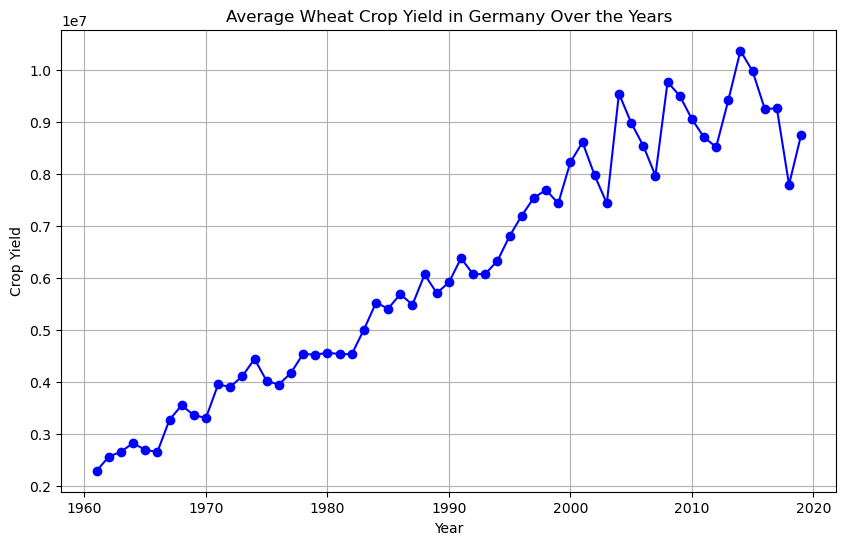

In [26]:
import matplotlib.pyplot as plt

# Specify the target crop and country
target_crop = 'Wheat'
target_country = 'Germany'  # Replace with the actual country name

# Filter data for the specific crop and country
filtered_data = crops_all[(crops_all['Item'] == target_crop) & (crops_all['Area'] == target_country)]

# Group by 'year' and calculate the mean crop yield for each year
mean_yield_by_year = filtered_data.groupby('Year')['Value'].mean().reset_index()

# Plotting the line chart
plt.figure(figsize=(10, 6))
plt.plot(mean_yield_by_year['Year'], mean_yield_by_year['Value'], marker='o', linestyle='-', color='b')
plt.title(f'Average {target_crop.capitalize()} Crop Yield in {target_country} Over the Years')
plt.xlabel('Year')
plt.ylabel('Crop Yield')
plt.grid(True)
plt.show()


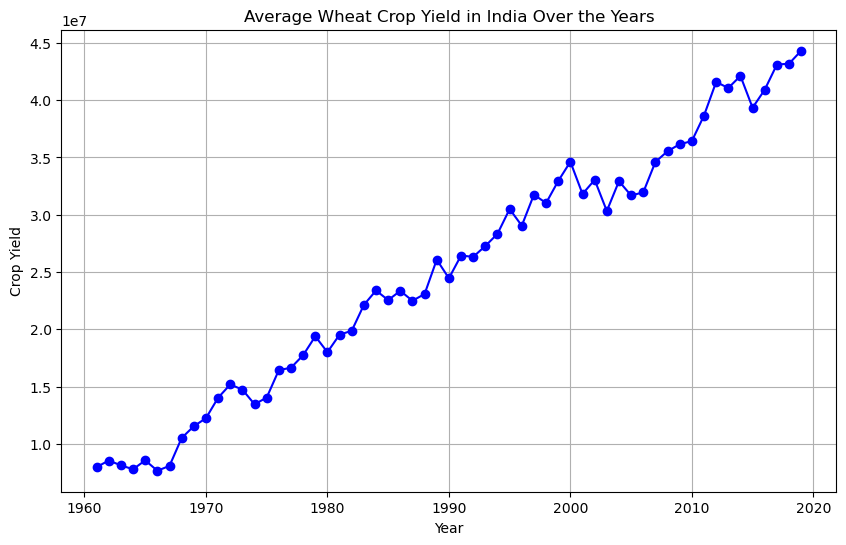

In [125]:
# Specify the target crop and country
target_crop = 'Wheat'
target_country = 'India'  # Replace with the actual country name

# Filter data for the specific crop and country
filtered_data = crops_all[(crops_all['Item'] == target_crop) & (crops_all['Area'] == target_country)]

# Group by 'year' and calculate the mean crop yield for each year
mean_yield_by_year = filtered_data.groupby('Year')['Value'].mean().reset_index()

# Plotting the line chart
plt.figure(figsize=(10, 6))
plt.plot(mean_yield_by_year['Year'], mean_yield_by_year['Value'], marker='o', linestyle='-', color='b')
plt.title(f'Average {target_crop.capitalize()} Crop Yield in {target_country} Over the Years')
plt.xlabel('Year')
plt.ylabel('Crop Yield')
plt.grid(True)
plt.show()


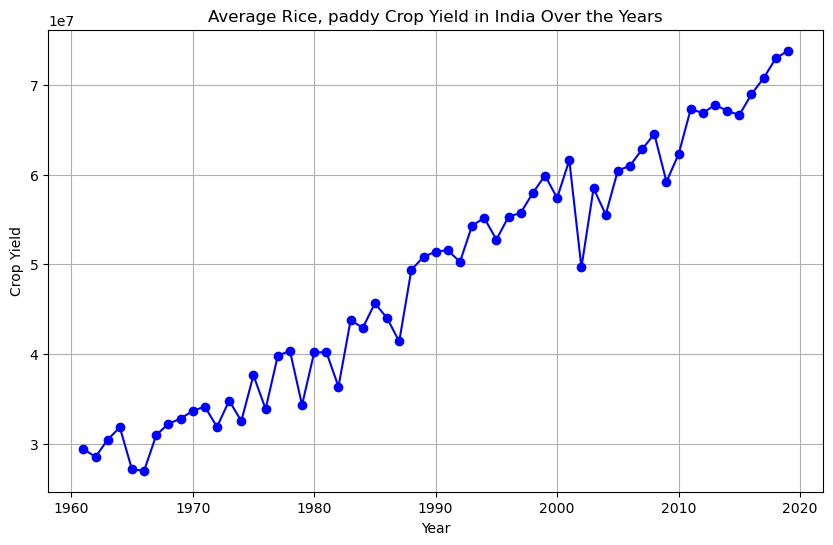

In [138]:
# Specify the target crop and country
target_crop = 'Rice, paddy'
target_country = 'India'  

# Filter data for the specific crop and country
filtered_data = crops_all[(crops_all['Item'] == target_crop) & (crops_all['Area'] == target_country)]

# Group by 'year' and calculate the mean crop yield for each year
mean_yield_by_year = filtered_data.groupby('Year')['Value'].mean().reset_index()

# Plotting the line chart
plt.figure(figsize=(10, 6))
plt.plot(mean_yield_by_year['Year'], mean_yield_by_year['Value'], marker='o', linestyle='-', color='b')
plt.title(f'Average {target_crop.capitalize()} Crop Yield in {target_country} Over the Years')
plt.xlabel('Year')
plt.ylabel('Crop Yield')
plt.grid(True)
plt.show()


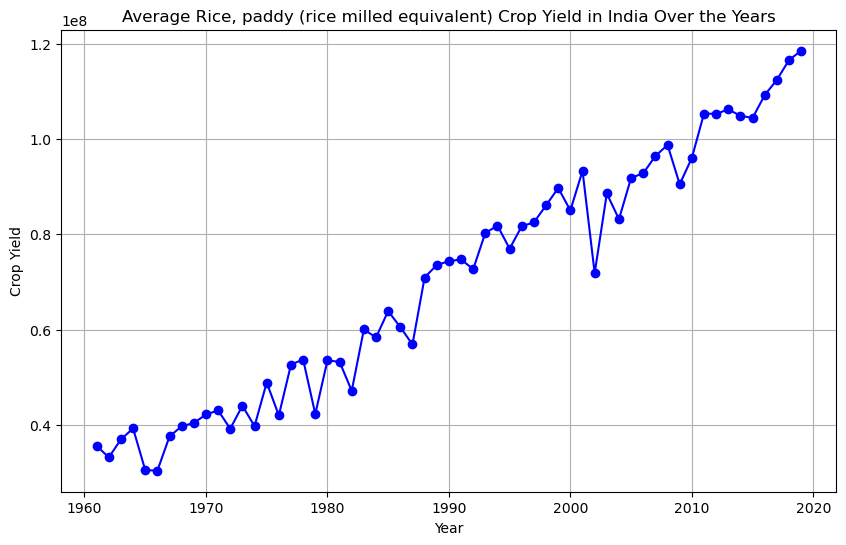

In [139]:
# Specify the target crop and country
target_crop = 'Rice, paddy (rice milled equivalent)'
target_country = 'India'  

# Filter data for the specific crop and country
filtered_data = crops_all[(crops_all['Item'] == target_crop) & (crops_all['Area'] == target_country)]

# Group by 'year' and calculate the mean crop yield for each year
mean_yield_by_year = filtered_data.groupby('Year')['Value'].mean().reset_index()

# Plotting the line chart
plt.figure(figsize=(10, 6))
plt.plot(mean_yield_by_year['Year'], mean_yield_by_year['Value'], marker='o', linestyle='-', color='b')
plt.title(f'Average {target_crop.capitalize()} Crop Yield in {target_country} Over the Years')
plt.xlabel('Year')
plt.ylabel('Crop Yield')
plt.grid(True)
plt.show()

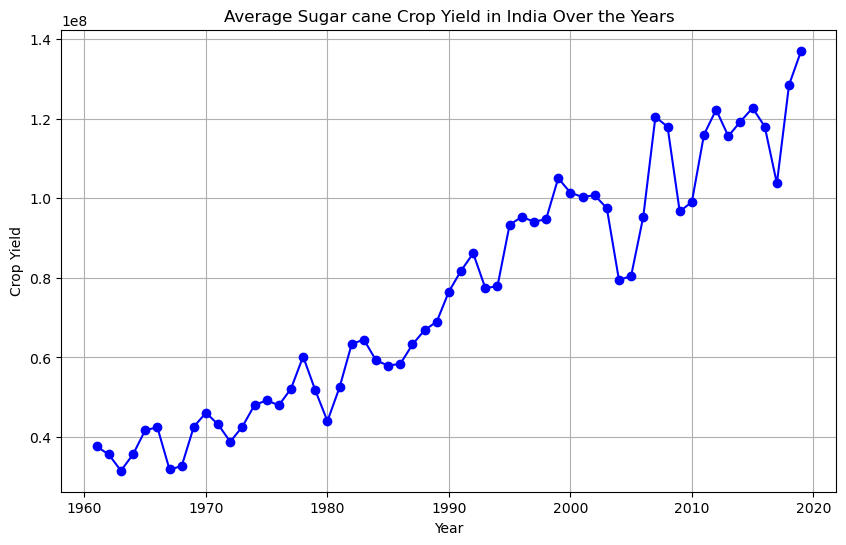

In [132]:
# Specify the target crop and country
target_crop = 'Sugar cane'
target_country = 'India'  # Replace with the actual country name

# Filter data for the specific crop and country
filtered_data = crops_all[(crops_all['Item'] == target_crop) & (crops_all['Area'] == target_country)]

# Group by 'year' and calculate the mean crop yield for each year
mean_yield_by_year = filtered_data.groupby('Year')['Value'].mean().reset_index()

# Plotting the line chart
plt.figure(figsize=(10, 6))
plt.plot(mean_yield_by_year['Year'], mean_yield_by_year['Value'], marker='o', linestyle='-', color='b')
plt.title(f'Average {target_crop.capitalize()} Crop Yield in {target_country} Over the Years')
plt.xlabel('Year')
plt.ylabel('Crop Yield')
plt.grid(True)
plt.show()


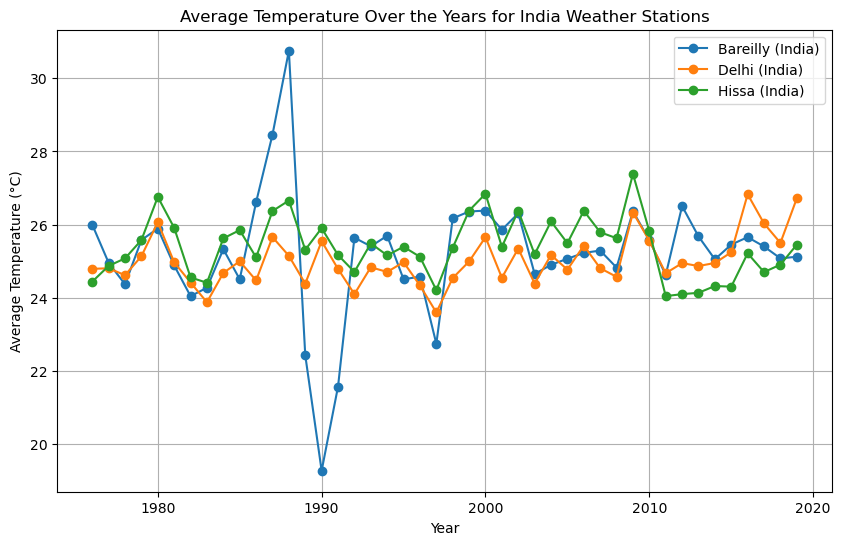

In [119]:

station_country_mapping = {
    '42189': {'station_name': 'Bareilly', 'country': 'India'},
    '42182': {'station_name': 'Delhi', 'country': 'India'},
    '42131': {'station_name': 'Hissa', 'country': 'India'}
}

# Extract the year from the 'weather_date' column
merged_weather['year'] = pd.to_datetime(merged_weather['weather_date']).dt.year

# Group by year and station, calculate the average temperature for each group
average_temp_by_station = merged_weather.groupby(['year', 'station'])['weather_tavg'].mean().reset_index()

# Plotting the line chart
plt.figure(figsize=(10, 6))

for station, info in station_country_mapping.items():
    station_data = average_temp_by_station[average_temp_by_station['station'] == station]
    plt.plot(station_data['year'], station_data['weather_tavg'], label=f'{info["station_name"]} ({info["country"]})', marker='o')

plt.title('Average Temperature Over the Years for India Weather Stations')
plt.xlabel('Year')
plt.ylabel('Average Temperature (°C)')
plt.legend()
plt.grid(True)
plt.show()


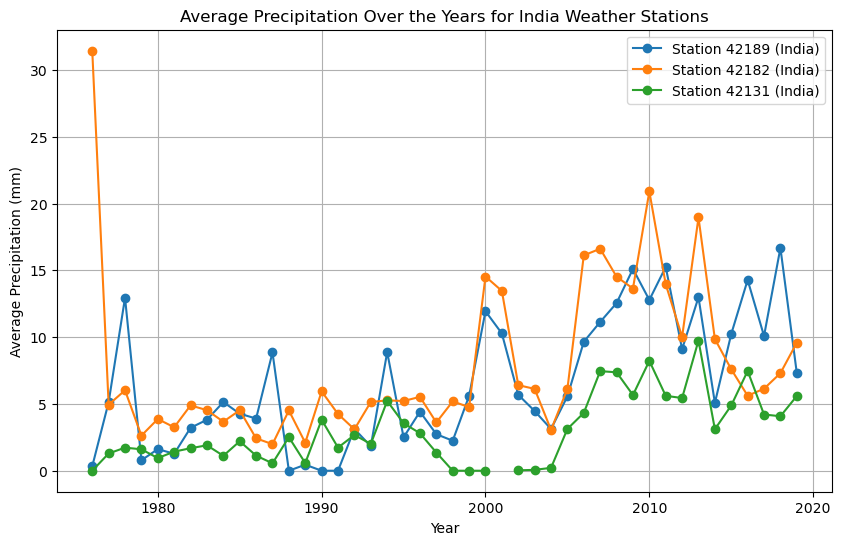

In [120]:

station_country_mapping = {
    '42189': 'India',
    '42182': 'India',
    '42131': 'India'
}

# Extract the year from the 'weather_date' column
merged_weather['year'] = pd.to_datetime(merged_weather['weather_date']).dt.year

# Group by year and station, calculate the average precipitation for each group
average_precipitation_by_station = merged_weather.groupby(['year', 'station'])['weather_prcp'].mean().reset_index()

# Plotting the line chart
plt.figure(figsize=(10, 6))

for station, country in station_country_mapping.items():
    station_data = average_precipitation_by_station[average_precipitation_by_station['station'] == station]
    plt.plot(station_data['year'], station_data['weather_prcp'], label=f'Station {station} ({country})', marker='o')

plt.title('Average Precipitation Over the Years for India Weather Stations')
plt.xlabel('Year')
plt.ylabel('Average Precipitation (mm)')
plt.legend()
plt.grid(True)
plt.show()


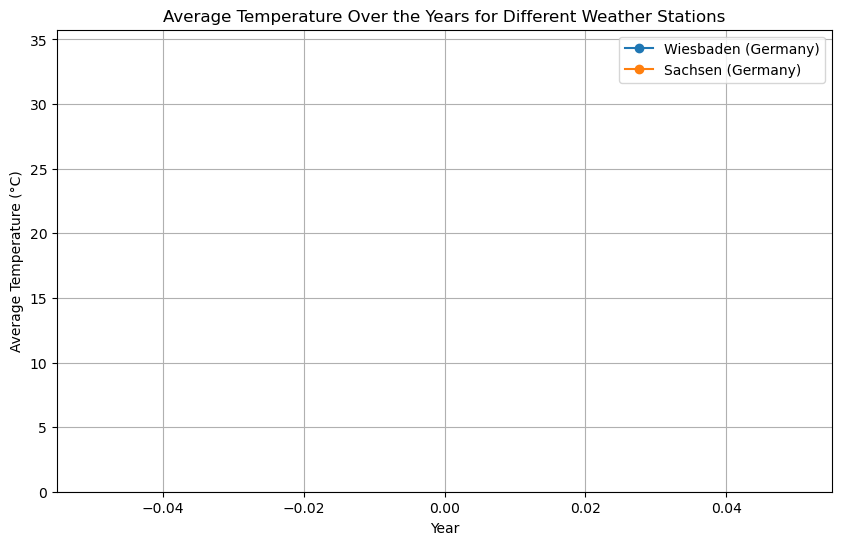

In [121]:
station_country_mapping = {
    'D5542': {'station_name': 'Wiesbaden', 'country': 'Germany'},
    'D3740': {'station_name': 'Sachsen', 'country': 'Germany'},
}

# Extract the year from the 'weather_date' column
merged_weather['year'] = pd.to_datetime(merged_weather['weather_date']).dt.year

# Group by year and station, calculate the average temperature for each group
average_temp_by_station = merged_weather.groupby(['year', 'station'])['weather_tavg'].mean().reset_index()

# Plotting the line chart
plt.figure(figsize=(10, 6))

for station, info in station_country_mapping.items():
    station_data = average_temp_by_station[average_temp_by_station['station'] == station]
    plt.plot(station_data['year'], station_data['weather_tavg'], label=f'{info["station_name"]} ({info["country"]})', marker='o')

plt.title('Average Temperature Over the Years for Different Weather Stations')
plt.xlabel('Year')
plt.ylabel('Average Temperature (°C)')
plt.legend()
plt.grid(True)

# Set the y-axis limits based on data distribution
plt.ylim(0, average_temp_by_station['weather_tavg'].max() + 5)

plt.show()


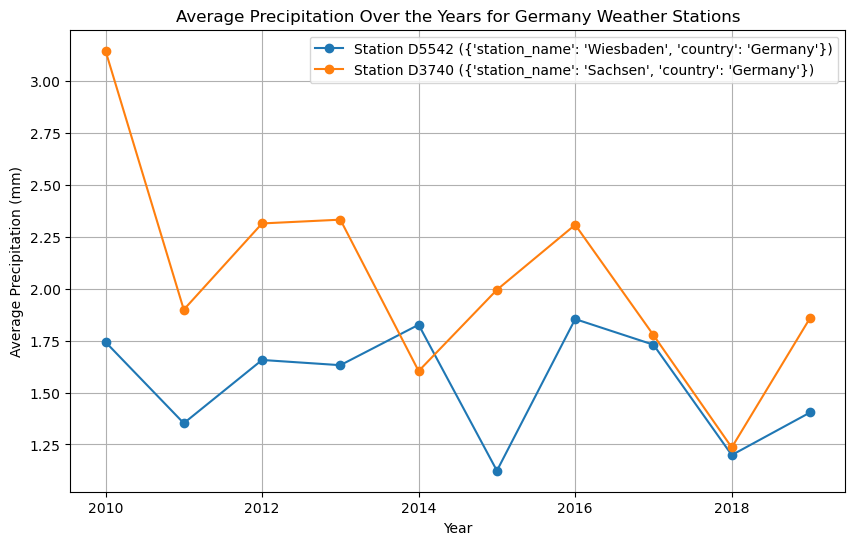

In [122]:
station_country_mapping = {
    'D5542': {'station_name': 'Wiesbaden', 'country': 'Germany'},
    'D3740': {'station_name': 'Sachsen', 'country': 'Germany'},
}

# Extract the year from the 'weather_date' column
merged_weather['year'] = pd.to_datetime(merged_weather['weather_date']).dt.year

# Group by year and station, calculate the average precipitation for each group
average_precipitation_by_station = merged_weather.groupby(['year', 'station'])['weather_prcp'].mean().reset_index()

# Plotting the line chart
plt.figure(figsize=(10, 6))

for station, country in station_country_mapping.items():
    station_data = average_precipitation_by_station[average_precipitation_by_station['station'] == station]
    plt.plot(station_data['year'], station_data['weather_prcp'], label=f'Station {station} ({country})', marker='o')

plt.title('Average Precipitation Over the Years for Germany Weather Stations')
plt.xlabel('Year')
plt.ylabel('Average Precipitation (mm)')
plt.legend()
plt.grid(True)
plt.show()


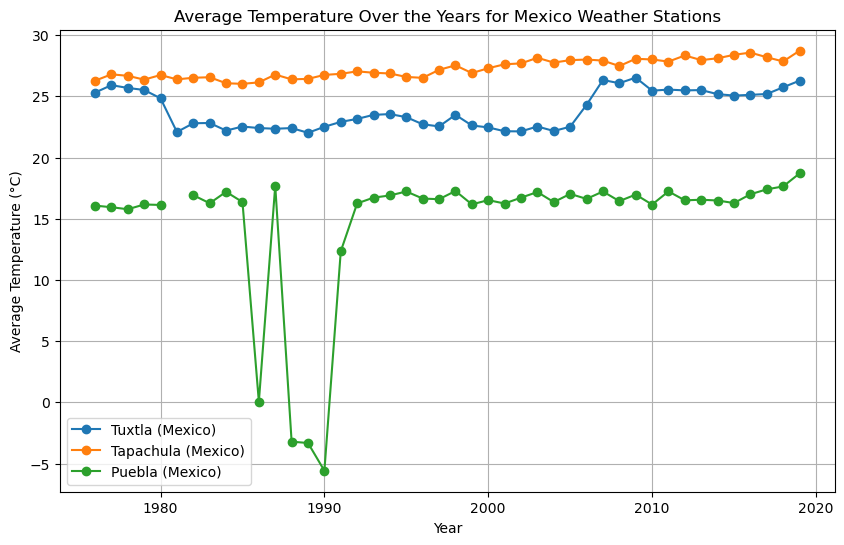

In [123]:

station_country_mapping = {
    '76843': {'station_name': 'Tuxtla', 'country': 'Mexico'},
    '76903': {'station_name': 'Tapachula', 'country': 'Mexico'},
    '76685': {'station_name': 'Puebla', 'country': 'Mexico'}
}

# Extract the year from the 'weather_date' column
merged_weather['year'] = pd.to_datetime(merged_weather['weather_date']).dt.year

# Group by year and station, calculate the average temperature for each group
average_temp_by_station = merged_weather.groupby(['year', 'station'])['weather_tavg'].mean().reset_index()

# Plotting the line chart
plt.figure(figsize=(10, 6))

for station, info in station_country_mapping.items():
    station_data = average_temp_by_station[average_temp_by_station['station'] == station]
    plt.plot(station_data['year'], station_data['weather_tavg'], label=f'{info["station_name"]} ({info["country"]})', marker='o')

plt.title('Average Temperature Over the Years for Mexico Weather Stations')
plt.xlabel('Year')
plt.ylabel('Average Temperature (°C)')
plt.legend()
plt.grid(True)
plt.show()

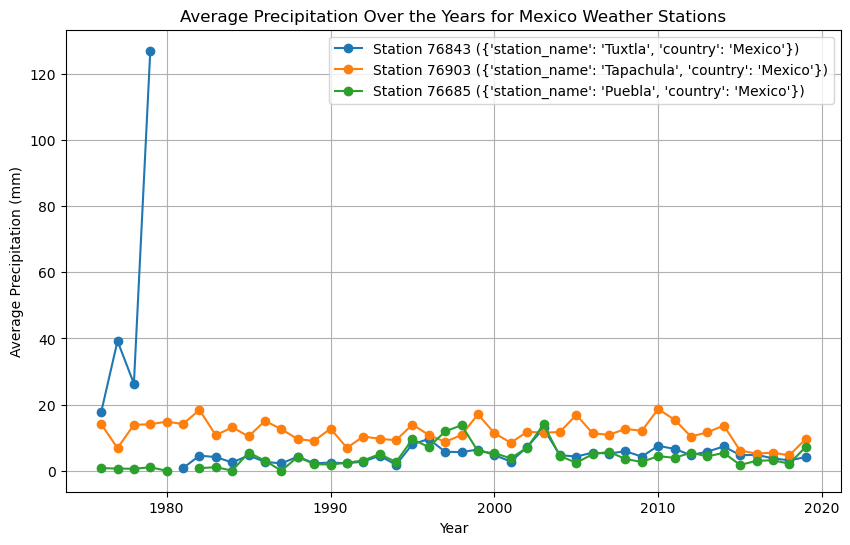

In [124]:
station_country_mapping = {
    '76843': {'station_name': 'Tuxtla', 'country': 'Mexico'},
    '76903': {'station_name': 'Tapachula', 'country': 'Mexico'},
    '76685': {'station_name': 'Puebla', 'country': 'Mexico'}
}

# Extract the year from the 'weather_date' column
merged_weather['year'] = pd.to_datetime(merged_weather['weather_date']).dt.year

# Group by year and station, calculate the average precipitation for each group
average_precipitation_by_station = merged_weather.groupby(['year', 'station'])['weather_prcp'].mean().reset_index()

# Plotting the line chart
plt.figure(figsize=(10, 6))

for station, country in station_country_mapping.items():
    station_data = average_precipitation_by_station[average_precipitation_by_station['station'] == station]
    plt.plot(station_data['year'], station_data['weather_prcp'], label=f'Station {station} ({country})', marker='o')

plt.title('Average Precipitation Over the Years for Mexico Weather Stations')
plt.xlabel('Year')
plt.ylabel('Average Precipitation (mm)')
plt.legend()
plt.grid(True)
plt.show()
